<a id="top"></a>
# Сборный проект
<h4 align="right">Артур Урусов</h4>

> Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Содержание

0. **[Подготовка](#0)**

    0.1. [Импорт библиотек](#0-1)


1. **[Получение данных](#1)**

    1.1. [Чтение файлов](#1-1) 
    
    1.2. [Выводы по первому этапу](#1-2)


2. **[Предобработка данных](#2)**

    2.1. [Заголовки](#2-1)
    
    2.2. [Название игры](#2-2)
    
    2.3. [Платформа](#2-3)
    
    2.4. [Год выпуска](#2-4)
    
    2.5. [Жанр](#2-5)
    
    2.6. [Продажи](#2-6)
    
    2.7. [Оценки](#2-7)
    
    2.8. [Рейтинг](#2-8)
    
    2.9. [Типы данных](#2-9)
    
    2.10. [Выводы по второму этапу](#2-10)


3. **[Анализ данных](#3)**

    3.1. [Сколько игр выпускалось в разные годы?](#3-1)
    
    3.2. [Как менялись продажи по платформам?](#3-2)
    
    3.3. [Какие платформы лидируют по продажам, растут или падают?](#3-3)
    
    3.4. [Как влияют на продажи отзывы пользователей и критиков?](#3-4)
    
    3.5. [Выделяются ли жанры с высокими и низкими продажами?](#3-5)
    
    3.6. [Выводы по третьему этапу](#3-6)
    
    
4. **[Портреты пользователей](#4)**

    3.1. [Потрет пользователя из Северной Америки](#4-1)
    
    3.2. [Потрет пользователя из Европы](#4-2)
    
    3.3. [Потрет пользователя из Японии](#4-3)
    
    3.4. [Выводы по четвертому этапу](#4-4)
    
    
5. **[Проверка гипотез](#5)**

    4.1. [Средние пользовательские рейтинги игр платформ Xbox One и PC не различаются](#5-1)
    
    4.2. [Средние пользовательские рейтинги игр жанров Action и Sports не различаются](#5-2)


6. **[Результаты исследования](#6)**

    5.1. [Общие выводы](#6-1)
    
    5.2. [Рекомендации](#6-2)

<a id="0"></a>
## Этап 0. Подготовка

<a id="0-1"></a>
### Шаг 0.1 Импорт библиотек

In [1]:
import platform
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats as st
pd.set_option('display.max_columns', None)

[к началу шага](#0-1) | [к началу этапа](#0) | [к началу страницы](#top)

<a id="1"></a>
## Этап 1. Получение данных

<a id="1-1"></a>
### Шаг 1.1 Чтение файла

Для начала откроем датасет и сохраним в переменную:

In [2]:
try:
    if platform.system() == 'Windows':
        # прочитаем файл с данными и сохраним в df (Windows)
        df = pd.read_csv('datasets\\games.csv')
    else:
        # прочитаем файл с данными с сохраним в df (UNIX-like)
        df = pd.read_csv('/datasets/games.csv')
except:
    print('Ошибка!')

Изучим общую информацию по датафрейму:

In [3]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Поразмыслим 🤔 над полученной информацией. 

Всего в датафрейме 16715 строк и 11 столбцов. Типы данных - float64(6), object(5).

Так выглядят наши столбцы, название колонки (количество значений и тип данных получены с помощью метода info(), описание значений взято из условия).

| Столбец         | Описание значения                                     | Количество значений | Тип данных | 
|:----------------|:------------------------------------------------------|:--------------------|:-----------|
| Name            | название игры                                         | 16713               | object     |
| Platform        | платформа                                             | 16715               | object     |
| Year_of_Release | год выпуска                                           | 16446               | float64    |
| Genre           | жанр игры                                             | 16713               | object     |
| NA_sales        | продажи в Северной Америке (миллионы проданных копий) | 16715               | float64    |
| EU_sales        | продажи в Европе (миллионы проданных копий)           | 16715               | float64    |
| JP_sales        | продажи в Японии (миллионы проданных копий)           | 16715               | float64    |
| Other_sales     | продажи в других странах (миллионы проданных копий)   | 16715               | float64    |
| Critic_Score    | оценка критиков (максимум 100)                        | 8137                | float64    |
| User_Score      | оценка пользователей (максимум 10)                    | 10014               | object     |
| Rating          | рейтинг от организации ESRB                           | 9949                | object     |

Заголовки столбцов лучше привести к нижнему регистру, так же стоит преобразовать некоторые типы данных. И что-то нужно сделать с пропущенными значениями.

[к началу шага](#1-1) | [к началу этапа](#1) | [к началу страницы](#top)

<a id="1-2"></a>
### Шаг 1.2 Выводы по первому этапу

Мы «прочитали» csv-файл и сохранили его как датафрейм в переменную df. Каждая строка датфрейма содержит информацию о конкретном игровом тайтле. Далее нам необходимо сделать следующее:
- Во-первых, предобработать данные. Нужно заменить названия столбцов (привести к нижнему регистру), преобразовать типы данных, обработать пропуски и понять причины их появления. Кроме того, по условию проекта необходимо посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
- Во-вторых, необходимо провести анализ данных: посмотреть, сколько игр выпускалось в разные годы, как менялись продажи по платформам, выбрать платформы с наибольшими суммарными продажами и построить распределение по годам, выбрать несколько потенциально прибыльных платформ.  Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам, оценить влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы, посмотреть на общее распределение игр по жанрам.
- В-третьих, мы составим портрет пользователя из каждого региона. Определим для пользователя каждого региона: 
  - Самые популярные платформы (топ-5).
  - Самые популярные жанры (топ-5).
  - Влияение рейтинга ESRB на продажи в отдельном регионе.
- В конце мы проверим две гипотезы:
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - Средние пользовательские рейтинги жанров Action и Sports разные.

[к началу шага](#1-2) | [к началу этапа](#1) | [к началу страницы](#top)

<a id="2"></a>
## Этап 2. Предобработка данных

<a id="2-1"></a>
### Шаг 2.1 Заголовки

Первым делом поменяем заголовки. Сменим формулировки и приведём все к нижнему регистру:

In [4]:
df.set_axis(['name', 'platform', 'year_released', 'genre', 'sales_na', 'sales_eu', 
        'sales_jp', 'sales_other', 'critics_score', 'users_score', 'age_rating'], axis='columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name             16713 non-null object
platform         16715 non-null object
year_released    16446 non-null float64
genre            16713 non-null object
sales_na         16715 non-null float64
sales_eu         16715 non-null float64
sales_jp         16715 non-null float64
sales_other      16715 non-null float64
critics_score    8137 non-null float64
users_score      10014 non-null object
age_rating       9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


[к началу шага](#2-1) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="2-2"></a>
### Шаг 2.2 Название игры

Обратимся к столбцу с играми. Во-первых, у нас есть две игры без названия, взглянем на них поближе:

In [5]:
df.loc[df['name'].isnull()]

,name,platform,year_released,genre,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,age_rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Восстановить информацию практически невозможно, игры всего две, значений очень мало. Вторая игра ещё и не особо продалавалась. С легкой душой избавимся от этих строк:

In [6]:
df = df[~df['name'].isnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name             16713 non-null object
platform         16713 non-null object
year_released    16444 non-null float64
genre            16713 non-null object
sales_na         16713 non-null float64
sales_eu         16713 non-null float64
sales_jp         16713 non-null float64
sales_other      16713 non-null float64
critics_score    8137 non-null float64
users_score      10014 non-null object
age_rating       9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Также проверим игры на задвоение (по названию и платформе и году выпуска):

In [7]:
df.loc[df.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_released,genre,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,age_rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Совпало 4 пары строк. Однако, *Need for Speed: Most Wanted* имеет разный год выпуска, поэтому не будем считать это за дубли. *Madden NFL 13* и *Sonic the Hedgehog* скорее всего продублировались по ошибке, видим, что данные по продажам сильно отличаются. С учетом того, что в дубликатах есть информация только по продажам в Европе, можно предположить что дубликаты относятся к региональным европейским изданиям этих игр. Просто сложим продажи по этим играм и удалим лишние строки:

In [8]:
df.loc[4127, 'year_released'] = 2006  #  добавим для игры Sonic the Hedgehog год выпуска

#  добавим данные по Европе в оригинальные строки
df.loc[604, 'sales_eu'] =  df.loc[604, 'sales_eu'] + df.loc[16230, 'sales_eu']
df.loc[1745, 'sales_eu'] =  df.loc[1745, 'sales_eu'] + df.loc[4127, 'sales_eu']

#  удаляем дубликаты
df.drop_duplicates(subset=['name', 'platform', 'year_released'], inplace=True)

In [9]:
df.loc[df.duplicated(subset=['name', 'platform', 'year_released'], keep=False)]

,name,platform,year_released,genre,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,age_rating


Дубликатов больше нет.

[к началу шага](#2-2) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="2-3"></a>
### Шаг 2.3 Платформа

Какие же игровые платформы представлены в рейтинге?

In [10]:
df.groupby('platform').count()

,name,year_released,genre,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,age_rating
platform,,,,,,,,,,
2600,133,116,133,133,133,133,133,0,0,0
3DO,3,3,3,3,3,3,3,0,0,0
3DS,520,512,520,520,520,520,520,168,230,228
DC,52,52,52,52,52,52,52,14,14,14
DS,2151,2121,2151,2151,2151,2151,2151,717,1272,1273
GB,98,97,98,98,98,98,98,0,0,0
GBA,822,811,822,822,822,822,822,438,517,522
GC,556,542,556,556,556,556,556,448,469,469
GEN,27,27,27,27,27,27,27,0,0,0


На первый взгляд проблем не видно. Всего представлено 32 платформы:

| № | Код | Производитель | Название | Годы выпуска | Тип платформы | Поколение | Дополнительная информация |
|:-:|:----|--------------:|:---------|:------------:|---------------|-----------|--------------------------:|
| 1 | 2600 | Atari | Atari 2600 | 1977 - 1992 | домашняя | 2 | [Википедия](https://ru.wikipedia.org/wiki/Atari_2600) |  
| 2 | 3DO | The 3DO Company, Panasonic, Sanyo, Creative и Goldstar (ныне LG) |	3DO Interactive Multiplayer | 1993 - 1996 | домашняя | 5 | [Википедия](https://ru.wikipedia.org/wiki/3DO_Interactive_Multiplayer) |
| 3 | **3DS** | **Nintendo** | **3DS** | **2011 - *2020*** | портативная | 8 | **[Википедия](https://ru.wikipedia.org/wiki/Nintendo_3DS)** |
| 4 | DC | Sega | Dreamcast | 1998 - 2001 | домашняя | 6 | [Википедия](https://ru.wikipedia.org/wiki/Dreamcast) |
| 5 | DS | Nintendo | DS | 2004 - 2013 | портативная | 7 | [Википедия](https://ru.wikipedia.org/wiki/Nintendo_DS) |
| 6 | GB | Nintendo | Game Boy | 1989 - 2003 | портативная | 4 | [Википедия](https://ru.wikipedia.org/wiki/Game_Boy) |
| 7 | GBA | Nintendo | Game Boy Advance | 2001 - 2008 | портативная | 6 | [Википедия](https://ru.wikipedia.org/wiki/Game_Boy_Advance) |
| 8 | GC | Nintendo | GameCube | 2001 - 2007 | домашняя | 6 | [Википедия](https://ru.wikipedia.org/wiki/Nintendo_GameCube) |
| 9 | GEN |	Sega | Genesis (Mega Drive) | 1988 - 1997 | домашняя | 4 | [Википедия](https://ru.wikipedia.org/wiki/Sega_Mega_Drive) |
| 10 | GG | Sega | Game Gear | 1990 - 1997 | портативная | 4 | [Википедия](https://ru.wikipedia.org/wiki/Sega_Game_Gear) |
| 11 | N64 |	Nintendo | 64 | 1996 - 2003 | домашняя | 5 | [Википедия](https://ru.wikipedia.org/wiki/Nintendo_64) |
| 12 | NES |	Nintendo | Entertainment System | 1983 - 2003 | домашняя | 3 | [Википедия](https://ru.wikipedia.org/wiki/Nintendo_Entertainment_System) | 
| 13 | NG |  SNK Corporation | Neo Geo CD | 1993 - 1996 | домашняя | 4 | [Википедия](https://en.wikipedia.org/wiki/Neo_Geo_CD) |
| 14 | **PC** | **Различные** | **Различные** |	**1950 - *н.в.*** | пк | 0 | **[Википедия](https://ru.wikipedia.org/wiki/PC-игра)** |
| 15 | PCFX | NEC | PC-FX | 1994 - 1998 | домашняя | 5 | [Википедия](https://ru.wikipedia.org/wiki/PC-FX) |
| 16 | PS  |	Sony | PlayStation | 1994 - 2006 | домашняя | 5 | [Википедия](https://ru.wikipedia.org/wiki/PlayStation) |
| 17 | PS2 |	Sony | PlayStation 2 | 2000 - 2013 | домашняя | 6 | [Википедия](https://ru.wikipedia.org/wiki/PlayStation_2) |
| 18 | **PS3** |	**Sony** | **PlayStation 3** | **2006 - *2017*** | домашняя | 7 | **[Википедия](https://ru.wikipedia.org/wiki/PlayStation_3)** |
| 19 | **PS4** | **Sony** | **PlayStation 4** | **2013 - н.в.** | домашняя | 8 | **[Википедия](https://ru.wikipedia.org/wiki/PlayStation_4)** |
| 20 | PSP | Sony | PlayStation Portable | 2004 - 2014 | портативная | 7 | [Википедия](https://ru.wikipedia.org/wiki/PlayStation_Portable) |
| 21 | **PSV** |	**Sony** | **PlayStation Vita** | **2011 - *2019*** | портативная | 8 | **[Википедия](https://ru.wikipedia.org/wiki/PlayStation_Vita)** |
| 22 | SAT | Sega | Saturn | 1994 - 2000 | домашняя | 5 | [Википедия](https://ru.wikipedia.org/wiki/Sega_Saturn) |
| 23 | SCD |	Sega | CD (Mega CD) | 1992 - 1996 | дополнение | 4 | [Википедия](https://ru.wikipedia.org/wiki/Sega_Mega-CD) |
| 24 | SNES | Nintendo | Super Nintendo Entertainment System | 1990 - 2003 | домашняя | 4 | [Википедия](https://ru.wikipedia.org/wiki/Super_Nintendo_Entertainment_System) |
| 25 | TG16 | NEC | PC Engine (TurboGrafx-16) | 1987 - 1995 | домашняя | 4 | [Википедия](https://ru.wikipedia.org/wiki/PC_Engine) |
| 26 | WS | Bandai | WonderSwan | 1999 - 2003 | портативная | 5 | [Википедия](https://ru.wikipedia.org/wiki/WonderSwan) |
| 27 | Wii |	Nintendo | Wii | 2006 - 2013 | домашняя | 7 | [Википедия](https://ru.wikipedia.org/wiki/Wii) |
| 28 | **WiiU** | **Nintendo** | **Wii U** | **2012 - *2017*** | домашняя | 8 | **[Википедия](https://ru.wikipedia.org/wiki/Wii_U)** |
| 29 | **X360** | **Microsoft** | **Xbox 360** | **2005 - *2016*** | домашняя | 7 | **[Википедия](https://ru.wikipedia.org/wiki/Xbox_360)** |
| 30 | XB | Microsoft | Xbox | 2001 - 2009 | домашняя | 6 | [Википедия](https://ru.wikipedia.org/wiki/Xbox) |
| 31 | **XOne** |  **Microsoft** | **Xbox One** | **2013 - *2020*** | домашняя | 8 | **[Википедия](https://ru.wikipedia.org/wiki/Xbox_One)** |

\* выделены поддерживаемые на момент исследования платформы

В исследовании представлены платформы поколений со 2 по 8, двух основных типов: домашняя и портативная консоли. Есть и две уникальные платформы: дополнение для консоли Sega CD и персональный комппьютер, с уникальной категорией и к которому неприменимо понятие поколения.

Sega CD на самом деле не является самостоятельной платформой &mdash; это дополнение для запуска игр на CD-носителях на консоли Sega Mega Drive (Genesis). Поэтому можем просто заменить код `SCD` на код `GEN`:

In [11]:
df.loc[df['platform'] == 'SCD', 'platform'] = 'GEN'

Так как нас интересуют не конкретные консоли, а закономерности, введение в датафрейм столбцов с типом консоли и поколением может помочь нам в исследовании. Напишем функцию:

In [12]:
def platform_type(df):
    dict_type = {'2600': 'home', '3DO': 'home', 'DC': 'home', 'GC': 'home', 'GEN': 'home', 'N64': 'home', 'NES': 'home', 
                 'NG': 'home', 'PCFX': 'home', 'PS': 'home', 'PS2': 'home', 'PS3': 'home', 'PS4': 'home', 'SAT': 'home', 
                 'SNES': 'home', 'TG16': 'home', 'Wii': 'home', 'WiiU': 'home', 'X360': 'home', 'XB': 'home', 'XOne': 'home',
                 '3DS': 'handheld', 'DS': 'handheld', 'GB': 'handheld', 'GBA': 'handheld', 'GG': 'handheld',  
                 'PSP': 'handheld', 'PSV': 'handheld', 'WS': 'handheld',
                 'PC': 'PC'} 
    dict_gen = {'PC': 0,
                '2600': 2, 
                '3DO': 3, 'NES': 3, 
                'GB': 4, 'GEN': 4, 'GG': 4, 'NG': 4, 'SCD': 4, 'SNES': 4, 'TG16': 4, 
                'N64': 5, 'PCFX': 5, 'PS': 5, 'SAT': 5, 'WS': 5, 
                'DC': 6, 'GBA': 6, 'GC': 6, 'PS2': 6, 'XB': 6, 
                'DS': 7, 'PS3': 7, 'PSP': 7, 'Wii': 7, 'X360': 7, 
                '3DS': 8, 'PS4': 8, 'PSV': 8, 'WiiU': 8, 'XOne': 8}
    #  присваиваем категорию "тип платформы"
    df['platform_type'] = df['platform'].apply(lambda x: dict_type.get(x))
    #  присваиваем номер поколения
    df['gen'] = df['platform'].apply(lambda x: dict_gen.get(x))
    
platform_type(df)
df.head(10)        

,name,platform,year_released,genre,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,age_rating,platform_type,gen
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,home,7
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,home,3
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,home,7
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,home,7
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,handheld,4
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,handheld,4
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,handheld,7
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,home,7
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,home,7
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,home,3


На этом с платформами можно закончить.

[к началу шага](#2-3) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="2-4"></a>
### Шаг 2.4 Год выпуска

Так как год хранится в числовом виде, проверим нет ли странных значений в этом столбце:

In [13]:
df['year_released'].describe().round(2)

count    16443.00
mean      2006.49
std          5.88
min       1980.00
25%       2003.00
50%       2007.00
75%       2010.00
max       2016.00
Name: year_released, dtype: float64

В столбце `year_released` у нас много пропущенных значений. Выведем их:

In [14]:
df.loc[(df['year_released'].isnull())]

,name,platform,year_released,genre,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,age_rating,platform_type,gen
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,home,6
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,home,6
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,home,7
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,home,6
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,home,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,handheld,7
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,home,6
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,PC,0
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,home,7


В целом, отсутствие года выглядит случайным, какой-то закономерности не видно. Скорее всего для этих игр год или просто не заполняли, или он был утерян из-за ошибок при сборе и хранении данных.

Заметим, что попадаются значения с годом в названии игры, попробуем офильтровать значения по этому признаку:

In [15]:
df.loc[(df['year_released'].isnull()) & (df.name.str.contains('[1-3][0-9]{3}'))]

,name,platform,year_released,genre,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,age_rating,platform_type,gen
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,home,6
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,home,6
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,home,6
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E,home,6
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,handheld,7
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E,home,6
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E,home,6
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E,home,6
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M,PC,0
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E,home,6


Игра Tomb Raider (2013) имеет в названии год выхода, поэтому для неё мы можем указать год самостоятельно. Остальные игры содержат в названии год, но по сложившейся в игровой индустрии практике, такие игры выпускают в конце года (обычно осенью), предшествующего году в названии. Определим функцию для подбора года выпуска:

In [16]:
df.loc[5336, 'year_released'] = 2013

def year_from_title(df):
    if df['year_released'] != df['year_released'] and bool(re.search('[1-3][0-9]{3}', df['name'])):
        for i in range(len(df['name'])):
            if df['name'][i:i+4].isdigit():
                return int(df['name'][i:i+4])
    else:
        return df['year_released']


df['year_released'] = df.apply(year_from_title, axis=1)

Проверим результат:

In [17]:
df.loc[(df['year_released'].isnull()) & (df.name.str.contains('[1-3][0-9]{3}'))]

,name,platform,year_released,genre,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,age_rating,platform_type,gen


Отлично, а теперь посмотрим на оставшиеся значения:

In [18]:
df.loc[(df['year_released'].isnull())]

,name,platform,year_released,genre,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,age_rating,platform_type,gen
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,home,7
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,home,2
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,home,7
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,handheld,6
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,home,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,home,7
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,home,6
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,PC,0
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,home,7


В принципе, мы можем просто заполнить год средним значением года выпуска игр по конкретной платформе:

In [19]:
for row in df.itertuples(name = None):
    if row[3] != row[3]:
        df.loc[row[0], 'year_released'] = np.ceil(df[df['platform'] == row[2]]['year_released'].mean())

Проверим результат:

In [20]:
df.loc[(df['year_released'].isnull())]

,name,platform,year_released,genre,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,age_rating,platform_type,gen


Пропущенных значений не осталось, отлично!

Мы уже добавили столбец с поколениями, однако для PC такое разделение неприменимо. Да и дополнительный вариант отследить закономерности не помешает. Поэтому добавим столбец с десятилетием (в рамках этого исследования десятилетие начинается с нулевого года и заканчивается девятым годом):

In [21]:
def decade(df):
    #  присваиваем категорию "тип платформы"
    df['decade'] = (df['year_released'] // 10) * 10
    
decade(df)
df.head(10)    

,name,platform,year_released,genre,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,age_rating,platform_type,gen,decade
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,home,7,2000.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,home,3,1980.0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,home,7,2000.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,home,7,2000.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,handheld,4,1990.0
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,handheld,4,1980.0
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,handheld,7,2000.0
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,home,7,2000.0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,home,7,2000.0
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,home,3,1980.0


[к началу шага](#2-4) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="2-5"></a>
### Шаг 2.5 Жанр

В столбце с жанрами пропущенных значений нет, но могут быть дубликаты, нужно проверить:

In [22]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Дубликатов нет, жанры подобраны адекватно, ничего в этом столбце менять не нужно.

[к началу шага](#2-5) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="2-6"></a>
### Шаг 2.6 Продажи

Продажи как числовые значения могут иметь неадекватные значения, проверим столбцы:

In [23]:
df[['sales_na', 'sales_eu', 'sales_jp', 'sales_other']].describe()

,sales_na,sales_eu,sales_jp,sales_other
count,16711.000000,16711.000000,16711.000000,16711.000000
mean,0.263334,0.145063,0.077634,0.047348
std,0.813609,0.503390,0.308888,0.186752
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


Выглядит хорошо, пропущенных значений нет.

Осталось только добавить столбец с общим количеством продаж:

In [24]:
df['sales_total'] = df['sales_na'] + df['sales_eu'] + df['sales_jp'] + df['sales_other']
df.head(10)

,name,platform,year_released,genre,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,age_rating,platform_type,gen,decade,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,home,7,2000.0,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,home,3,1980.0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,home,7,2000.0,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,home,7,2000.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,handheld,4,1990.0,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,handheld,4,1980.0,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,handheld,7,2000.0,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,home,7,2000.0,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,home,7,2000.0,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,home,3,1980.0,28.31


[к началу шага](#2-6) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="2-7"></a>
### Шаг 2.7 Оценки

А вот с оценками критиков и игроков ситуация не очень хорошая, пропущено около половины значений:

In [25]:
df[['critics_score', 'users_score']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 2 columns):
critics_score    8135 non-null float64
users_score      10012 non-null object
dtypes: float64(1), object(1)
memory usage: 1.0+ MB


Посмотрим на корреляцию:

In [26]:
df.corr()

,year_released,sales_na,sales_eu,sales_jp,sales_other,critics_score,gen,decade,sales_total
year_released,1.000000,-0.093354,0.004319,-0.166079,0.037986,0.010553,0.416616,0.899260,-0.076199
sales_na,-0.093354,1.000000,0.765365,0.449663,0.638692,0.240784,0.002439,-0.082582,0.941017
sales_eu,0.004319,0.765365,1.000000,0.435079,0.722991,0.220779,0.008565,0.008351,0.901266
sales_jp,-0.166079,0.449663,0.435079,1.000000,0.291085,0.152614,-0.034460,-0.149223,0.612323
sales_other,0.037986,0.638692,0.722991,0.291085,1.000000,0.198580,0.048992,0.028841,0.749333
critics_score,0.010553,0.240784,0.220779,0.152614,0.198580,1.000000,-0.151551,0.042533,0.245533
gen,0.416616,0.002439,0.008565,-0.034460,0.048992,-0.151551,1.000000,0.359908,0.003101
decade,0.899260,-0.082582,0.008351,-0.149223,0.028841,0.042533,0.359908,1.000000,-0.066968
sales_total,-0.076199,0.941017,0.901266,0.612323,0.749333,0.245533,0.003101,-0.066968,1.000000


Оценки критиков слабо коррелируют с продажами, оценок пользователей вообще нет, так как столбец нечисловой.

Среди оценок игроков всплывает такой термин как `tbd` что означает to be determined или to be declared. Другими словами, оценки еще не подсчитаны. Однако такое значение есть и у давно вышедших игр. Нам оно не даёт ключевой информации, поэтому просто заменим `tbd` на `NaN` и переведём столбец во `float`:

In [27]:
df.loc[df['users_score'] == 'tbd', 'users_score'] = np.nan
df['users_score'] = df['users_score'].astype('float')

Снова посмотрим на корреляцию:

In [28]:
df.corr()

,year_released,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,gen,decade,sales_total
year_released,1.000000,-0.093354,0.004319,-0.166079,0.037986,0.010553,-0.265809,0.416616,0.899260,-0.076199
sales_na,-0.093354,1.000000,0.765365,0.449663,0.638692,0.240784,0.086066,0.002439,-0.082582,0.941017
sales_eu,0.004319,0.765365,1.000000,0.435079,0.722991,0.220779,0.055216,0.008565,0.008351,0.901266
sales_jp,-0.166079,0.449663,0.435079,1.000000,0.291085,0.152614,0.125554,-0.034460,-0.149223,0.612323
sales_other,0.037986,0.638692,0.722991,0.291085,1.000000,0.198580,0.057014,0.048992,0.028841,0.749333
critics_score,0.010553,0.240784,0.220779,0.152614,0.198580,1.000000,0.580872,-0.151551,0.042533,0.245533
users_score,-0.265809,0.086066,0.055216,0.125554,0.057014,0.580872,1.000000,-0.054453,-0.219221,0.088048
gen,0.416616,0.002439,0.008565,-0.034460,0.048992,-0.151551,-0.054453,1.000000,0.359908,0.003101
decade,0.899260,-0.082582,0.008351,-0.149223,0.028841,0.042533,-0.219221,0.359908,1.000000,-0.066968
sales_total,-0.076199,0.941017,0.901266,0.612323,0.749333,0.245533,0.088048,0.003101,-0.066968,1.000000


Оказывается существует средняя корреляция между оценками критиков и пользователей, посмотрим сколько значений мы сможем заполнить исходя из этого:

In [29]:
len_xor = len(df.loc[~df['critics_score'].isnull() & df['users_score'].isnull()]) + len(df.loc[df['critics_score'].isnull() 
                                                                                               & ~df['users_score'].isnull()])
len_xor

1693

Все значения мы заполнить не сможем, но 1693 уже неплохо. Посмотрим на график зависимости:

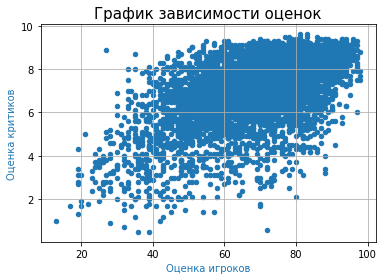

In [30]:
df.plot.scatter(x='critics_score', y='users_score', c='tab:blue')
plt.xlabel('Оценка игроков', fontsize=10, color='tab:blue')
plt.ylabel('Оценка критиков', fontsize=10, color='tab:blue')
plt.title('График зависимости оценок', fontsize=15)
plt.grid(True)

Напишем функции для определения оценок:

In [31]:
mn_crit_user_ratio = (df['critics_score'] / df['users_score']).mean()

def crit_normal(df):
    if (df['critics_score'] != df['critics_score']) and (df['users_score'] == df['users_score']):
        return mn_crit_user_ratio * df['users_score']
    else:
        return df['critics_score']

def user_normal(df):
    if (df['users_score'] != df['users_score']) and (df['critics_score'] == df['critics_score']):
        return df['critics_score'] / mn_crit_user_ratio
    else:
        return df['users_score']
    
df['critics_score'] = df.apply(crit_normal, axis=1)
df['users_score'] = df.apply(user_normal, axis=1)

df.head(10)

,name,platform,year_released,genre,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,age_rating,platform_type,gen,decade,sales_total
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,home,7,2000.0,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,home,3,1980.0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,home,7,2000.0,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,home,7,2000.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,handheld,4,1990.0,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,handheld,4,1980.0,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,handheld,7,2000.0,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,home,7,2000.0,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,home,7,2000.0,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,home,3,1980.0,28.31


Снова взглянем на график:

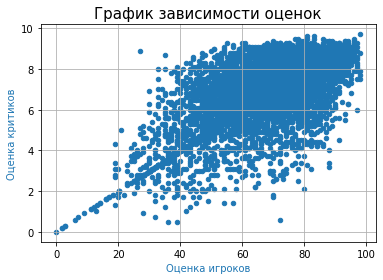

In [32]:
df.plot.scatter(x='critics_score', y='users_score', c='tab:blue')
plt.xlabel('Оценка игроков', fontsize=10, color='tab:blue')
plt.ylabel('Оценка критиков', fontsize=10, color='tab:blue')
plt.title('График зависимости оценок', fontsize=15)
plt.grid(True)

В целом больших изменений не видно, но появился «хвост» на низких значениях. В целом ничего страшного не произошло, для очень плохих игр единодушие критиков и игроков не то чтобы удивительно.

Для остальных оценок восстановить значения, к сожалению не представляется возможным. Большая часть пропущенных оценок относится к старым играм. Возможно ресурса с которого брали оценки для исследования тогда не существовало, либо это связано с отсутствием оценок к этим играм в принципе.

Оценки достаточно субъективный фактор и не всегда точно отслеживаются с помощью других метрик. Поэтому остальные пропущенные значения трогать мы не будем. Осталось округлить значения в этих столбцах до 1 знака после запятой:

In [33]:
df['critics_score'] = df['critics_score'].round(0)
df['users_score'] = df['users_score'].round(1)

[к началу шага](#2-7) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="2-8"></a>
### Шаг 2.8 Рейтинг

Посмотрим, есть ли какая-то зависимость пропущенных значений от каких-то других значений:

In [34]:
df.loc[df['age_rating'].isnull()].describe()

,year_released,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,gen,decade,sales_total
count,6764.000000,6764.000000,6764.000000,6764.000000,6764.000000,99.000000,99.000000,6764.000000,6764.000000,6764.000000
mean,2004.856002,0.183424,0.090671,0.124472,0.022324,68.040404,6.920202,5.967327,2000.102011,0.420891
std,7.537807,0.796083,0.348012,0.383076,0.092140,13.275664,1.386449,1.673999,8.366774,1.356029
min,1980.000000,0.000000,0.000000,0.000000,0.000000,31.000000,3.100000,0.000000,1980.000000,0.000000
25%,1999.000000,0.000000,0.000000,0.000000,0.000000,62.000000,6.100000,5.000000,1990.000000,0.040000
50%,2007.000000,0.000000,0.000000,0.020000,0.000000,69.000000,7.200000,6.000000,2000.000000,0.110000
75%,2011.000000,0.120000,0.050000,0.100000,0.010000,78.500000,8.000000,7.000000,2010.000000,0.330000
max,2016.000000,29.080000,10.950000,10.220000,2.740000,93.000000,9.200000,8.000000,2010.000000,40.240000


In [35]:
df.loc[~df['age_rating'].isnull()].describe()

,year_released,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,gen,decade,sales_total
count,9947.000000,9947.000000,9947.000000,9947.000000,9947.000000,8609.000000,8609.000000,9947.000000,9947.000000,9947.000000
mean,2007.581180,0.317673,0.182049,0.045784,0.064365,68.717970,6.982344,6.182869,2003.062230,0.609870
std,4.084361,0.820922,0.583095,0.240850,0.228269,14.450512,1.504829,1.909378,4.849686,1.662281
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1980.000000,0.010000
25%,2004.000000,0.050000,0.010000,0.000000,0.010000,60.000000,6.100000,6.000000,2000.000000,0.080000
50%,2008.000000,0.120000,0.040000,0.000000,0.020000,71.000000,7.300000,7.000000,2000.000000,0.210000
75%,2010.000000,0.300000,0.150000,0.000000,0.050000,79.000000,8.100000,7.000000,2010.000000,0.560000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,98.000000,9.700000,8.000000,2010.000000,82.540000


Каких-то чётких зависимостей нет, но мы видим, что игры продававшиеся в США более 29 млн. копий, Европе более 11 млн. копий, в других регионах более 2,75 млн. копий и во всём мире более 40,25 млн. копий не выходят без рейтинга ESRB. Для Японии ситуация обратная &mdash; игры более 6,5 млн. проданных копий выходят без рейтинга ESBR. Скорее всего это связано с тем, что ESBR &mdash; американская система оценки, в Европе и Японии существуют свои системы (PEGI и CERO). При этом, в Европе, судя по всему ESBR более распространена, чем в Японии.

Так же видим, что игры без оценок в среднем старше, чем игры с оценками. Это логично, ведь ESRB появился в 1994 году. Значит оценок до 1994 года быть не должно, либо они выставлены ретроспективно.

Посмотрим на уникальные категории рейтинга:

In [36]:
df['age_rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Воспользовавшись информацией из [Википедии](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board), присвоим категориям числовые значения в виде минимального возраста (категория «K-A» с 1998&nbsp;года переименована в «E»), а категорию RP заменим на `NaN`:

In [37]:
df.loc[df['age_rating'] == 'RP', 'age_rating'] = np.nan
df.loc[df['age_rating'] == 'K-A', 'age_rating'] = 'E'
df['age_rating_num'] = df['age_rating'].replace({'EC': 3, 'E': 6, 'E10+': 10, 'T': 13, 'M': 17, 'AO': 18})

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 16 columns):
name              16711 non-null object
platform          16711 non-null object
year_released     16711 non-null float64
genre             16711 non-null object
sales_na          16711 non-null float64
sales_eu          16711 non-null float64
sales_jp          16711 non-null float64
sales_other       16711 non-null float64
critics_score     8708 non-null float64
users_score       8708 non-null float64
age_rating        9944 non-null object
platform_type     16711 non-null object
gen               16711 non-null int64
decade            16711 non-null float64
sales_total       16711 non-null float64
age_rating_num    9944 non-null float64
dtypes: float64(10), int64(1), object(5)
memory usage: 2.8+ MB


[к началу шага](#2-8) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="2-9"></a>
### Шаг 2.9 Типы данных

Напоследок поменяем порядок столбцов:

In [39]:
cols = ['name', 'platform', 'platform_type', 'gen', 'year_released', 'decade', 'genre', 'sales_total', 'sales_na', 'sales_eu', 
        'sales_jp', 'sales_other', 'critics_score', 'users_score', 'age_rating', 'age_rating_num']
df = df[cols]
df.head(10)

,name,platform,platform_type,gen,year_released,decade,genre,sales_total,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,age_rating,age_rating_num
0,Wii Sports,Wii,home,7,2006.0,2000.0,Sports,82.54,41.36,28.96,3.77,8.45,76.0,8.0,E,6.0
1,Super Mario Bros.,NES,home,3,1985.0,1980.0,Platform,40.24,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,home,7,2008.0,2000.0,Racing,35.52,15.68,12.76,3.79,3.29,82.0,8.3,E,6.0
3,Wii Sports Resort,Wii,home,7,2009.0,2000.0,Sports,32.77,15.61,10.93,3.28,2.95,80.0,8.0,E,6.0
4,Pokemon Red/Pokemon Blue,GB,handheld,4,1996.0,1990.0,Role-Playing,31.38,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN
5,Tetris,GB,handheld,4,1989.0,1980.0,Puzzle,30.26,23.20,2.26,4.22,0.58,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,handheld,7,2006.0,2000.0,Platform,29.80,11.28,9.14,6.50,2.88,89.0,8.5,E,6.0
7,Wii Play,Wii,home,7,2006.0,2000.0,Misc,28.91,13.96,9.18,2.93,2.84,58.0,6.6,E,6.0
8,New Super Mario Bros. Wii,Wii,home,7,2009.0,2000.0,Platform,28.32,14.44,6.94,4.70,2.24,87.0,8.4,E,6.0
9,Duck Hunt,NES,home,3,1984.0,1980.0,Shooter,28.31,26.93,0.63,0.28,0.47,NaN,NaN,NaN,NaN


И поменяем тип данных:

In [40]:
df['year_released'] = df['year_released'].astype('int')
df['decade'] = df['decade'].astype('int')

In [41]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 16 columns):
name              16711 non-null object
platform          16711 non-null object
platform_type     16711 non-null object
gen               16711 non-null int64
year_released     16711 non-null int64
decade            16711 non-null int64
genre             16711 non-null object
sales_total       16711 non-null float64
sales_na          16711 non-null float64
sales_eu          16711 non-null float64
sales_jp          16711 non-null float64
sales_other       16711 non-null float64
critics_score     8708 non-null float64
users_score       8708 non-null float64
age_rating        9944 non-null object
age_rating_num    9944 non-null float64
dtypes: float64(8), int64(3), object(5)
memory usage: 2.8+ MB


,name,platform,platform_type,gen,year_released,decade,genre,sales_total,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,age_rating,age_rating_num
0,Wii Sports,Wii,home,7,2006,2000,Sports,82.54,41.36,28.96,3.77,8.45,76.0,8.0,E,6.0
1,Super Mario Bros.,NES,home,3,1985,1980,Platform,40.24,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,home,7,2008,2000,Racing,35.52,15.68,12.76,3.79,3.29,82.0,8.3,E,6.0
3,Wii Sports Resort,Wii,home,7,2009,2000,Sports,32.77,15.61,10.93,3.28,2.95,80.0,8.0,E,6.0
4,Pokemon Red/Pokemon Blue,GB,handheld,4,1996,1990,Role-Playing,31.38,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN


[к началу шага](#2-9) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="2-10"></a>
### Шаг 2.10 Выводы по второму этапу

На этапе предобработки данных мы подготовили датафрейм для дальнейшего анализа. Заменили заголовки столбцов, проработали каждый столбец. В итоге мы преобразовали типы данных и значения, заполнили пропущенные значения, добавили новые столбцы.

[к началу шага](#2-10) | [к началу этапа](#2) | [к началу страницы](#top)

<a id="3"></a>
## Этап 3. Анализ данных

<a id="3-1"></a>
### Шаг 3.1 Сколько игр выпускалось в разные годы?

Мы можем посмотреть как выпускались игры на разных поколениях консолей (для ПК эта информация не подходит):

In [42]:
gens = df.groupby('gen').agg({'year_released': 'count', 'sales_total': 'sum', 'sales_na': 'sum', 'sales_eu': 'sum', 
                              'sales_jp': 'sum', 'sales_other': 'sum', 'critics_score': 'mean', 'users_score': 'mean'})
gens.columns = ['games_released', 'sales_total', 'sales_na', 'sales_eu', 'sales_jp', 'sales_other', 
                'average_critics_score', 'average_users_score']
gens = gens.reset_index()
gens

,gen,games_released,sales_total,sales_na,sales_eu,sales_jp,sales_other,average_critics_score,average_users_score
0,0,974,259.52,94.53,142.44,0.17,22.38,75.757033,7.064322
1,2,133,96.98,90.60,5.47,0.00,0.91,NaN,NaN
2,3,101,251.15,125.94,21.15,98.75,5.31,NaN,NaN
3,4,385,487.35,195.82,72.74,206.43,12.36,NaN,NaN
4,5,1696,984.58,476.26,255.21,207.75,45.36,71.606796,7.497087
5,6,4415,2046.24,1096.96,515.89,218.05,215.34,69.117744,7.341326
6,7,7271,3918.75,1984.43,1118.83,414.30,401.19,66.420666,6.689195
7,8,1736,868.72,336.03,292.41,151.89,88.39,70.296000,6.814400


Что можно понять из этого среза?
Во-первых, начиная с 5 поколения количество выпускаемых игр резко возросло. На момент исследования пик приходится на 7-е поколение, однако 8-е поколение только появилось на рынке, поэтому ожидаем увеличение игр для платформ 8-го поколения.

Во-вторых, наиболее крупным рынком видеоигр является регион Северная Америка. Только в одном случае этот регион оказался не на первом месте &mdash; совокупные продажи PC-игр за всё время в Европе больше.

В-третьих, специализированные игровые платформы занимают значительно большую долю рынка игр, чем универсальные ПК.

В-четвёртых, тренд по средним оценкам игр как критиками, так и пользователями скорее нисходящий. Вероятно это связано с резко возросшим количеством игр и возросшей культурой их потребления. Что интересно 🤔, для поколений со 2 по 4 оценок нет в принципе.

Можно сказать, что в связи с ростом рынка, количество профессиональных разработчиков увеличилось. Вместе с этим увеличилось и количество готовых решений для производства игр, порог вхождения в разработку понизился, появилось большое количество новых команд и энтузиастов-одиночек. Сформировался достаточно крупный жанр инди игр. Однако, с повышением количества игр и с переходам к современным бизнес-процессам производство игр сильно изменилось, и теперь их ежегодно появляется всё больше и больше. Обратной стороной этого процесса является ухудшение качества готового продукта, что и отражается на оценках. Для нового поколения консолей этого может не наблюдаться потому что на них в первую очередь выпускаются либо новые ААА-тайтлы, либо портируются уже успешные игры прошлых поколений.

Посмотрим, как ситуация выглядит с точки зрения десятилетий:

In [43]:
decades = df.groupby('decade').agg({'year_released': 'count', 'sales_total': 'sum', 'sales_na': 'sum', 'sales_eu': 'sum', 
                              'sales_jp': 'sum', 'sales_other': 'sum', 'critics_score': 'mean', 'users_score': 'mean'})
decades.columns = ['games_released', 'sales_total', 'sales_na', 'sales_eu', 'sales_jp', 'sales_other', 
                'average_critics_score', 'average_users_score']
decades = decades.reset_index()
decades

,decade,games_released,sales_total,sales_na,sales_eu,sales_jp,sales_other,average_critics_score,average_users_score
0,1980,222,386.98,245.48,31.81,102.49,7.20,61.500000,4.000000
1,1990,1780,1283.72,578.74,284.43,372.83,47.72,80.481481,8.170370
2,2000,9370,4678.55,2434.84,1261.15,515.85,466.71,68.215392,7.114247
3,2010,5339,2564.04,1141.51,846.75,306.17,269.61,69.342481,6.639586


В целом, сюрпризов нет. Хотя, почему-то в 1980-х средние оценки уж очень низкие. Похоже хорошие игры тогда не оценивали 😅.

Посмотрим отдельно на ситуацию с ПК:

In [44]:
pc_decades = df.loc[df['platform'] == 'PC'].groupby('decade').agg({'year_released': 'count', 'sales_total': 'sum', 
                                                                   'sales_na': 'sum', 'sales_eu': 'sum', 'sales_jp': 'sum', 
                                                                   'sales_other': 'sum', 'critics_score': 'mean', 
                                                                   'users_score': 'mean'})
pc_decades.columns = ['games_released', 'sales_total', 'sales_na', 'sales_eu', 'sales_jp', 'sales_other', 
                'average_critics_score', 'average_users_score']
pc_decades = pc_decades.reset_index()
pc_decades

,decade,games_released,sales_total,sales_na,sales_eu,sales_jp,sales_other,average_critics_score,average_users_score
0,1980,2,0.07,0.00,0.05,0.00,0.02,61.500000,4.000000
1,1990,38,49.97,29.41,18.98,0.09,1.49,87.500000,8.600000
2,2000,454,87.17,25.99,54.34,0.08,6.76,77.020888,7.528721
3,2010,480,122.31,39.13,69.07,0.00,14.11,73.925729,6.527321


Видим похожие тенденции и здесь.

И, начиная с 2000-х Европа опередила США по уровню продаж PC-игр. В Японии же PC-игры не пользуются популярностью.

Посмотрим на гистограммы:

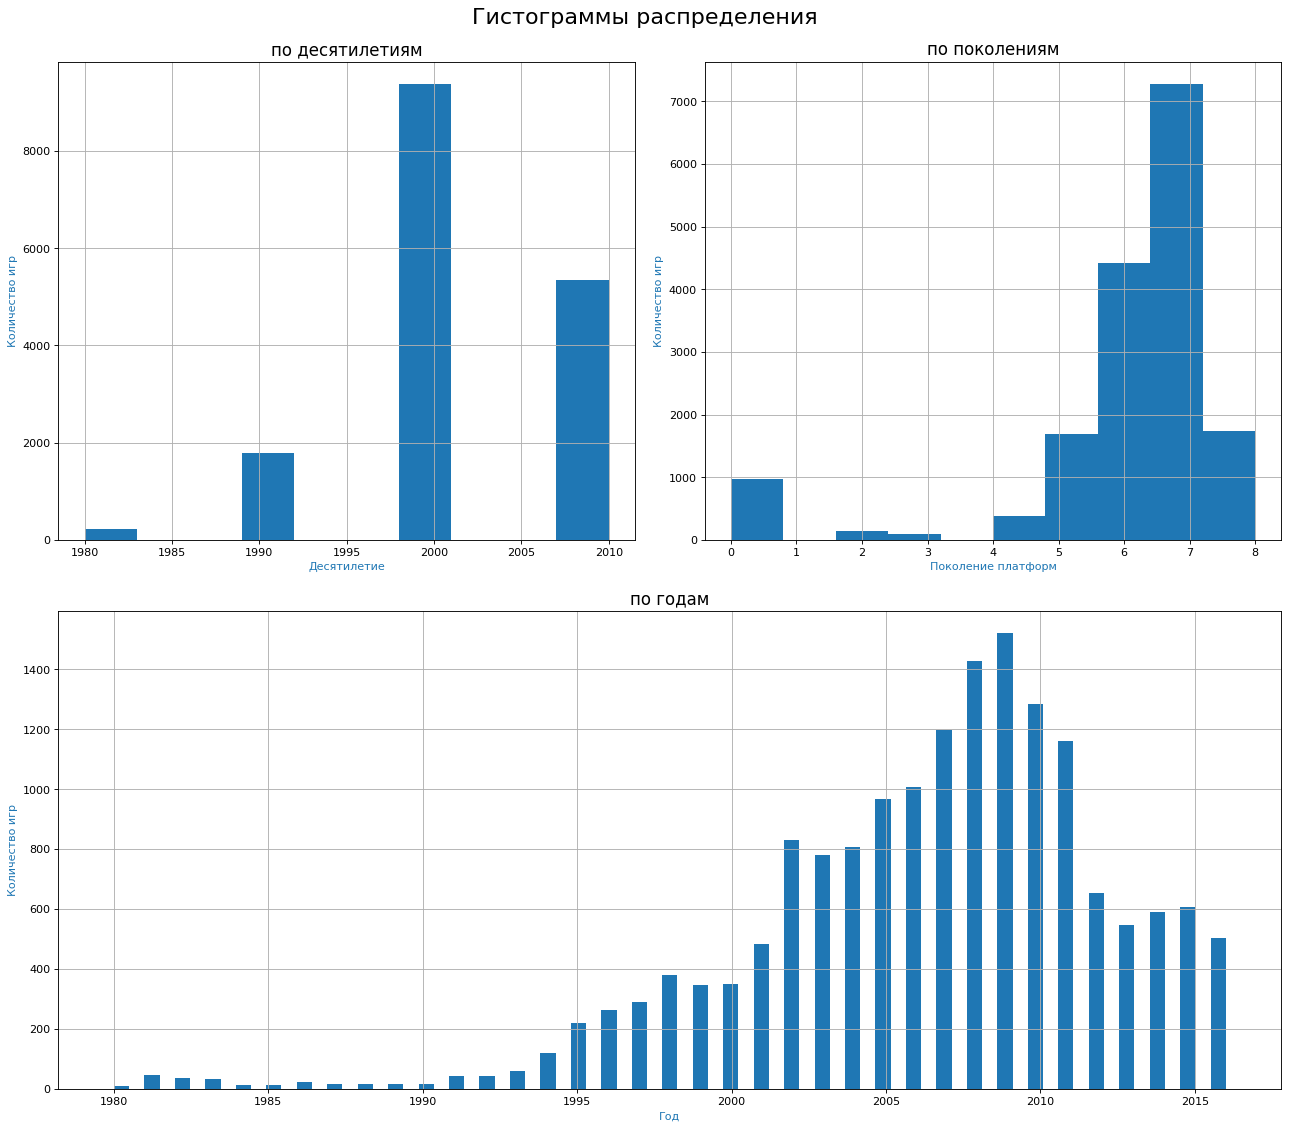

In [45]:
fig = plt.figure(constrained_layout=True, figsize=(16,14), dpi=80)

gs = GridSpec(2, 2, figure=fig)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, :])

x0 = df['decade']
x1 = df['gen']
x2 = df['year_released']

#  гистограмма по десятилетиям
ax0.hist(x0, facecolor='tab:blue', alpha=1)
ax0.set_xlabel('Десятилетие', fontsize=10, color='tab:blue')
ax0.set_ylabel('Количество игр', fontsize=10, color='tab:blue')
ax0.set_title('по десятилетиям', fontsize=15)
ax0.grid(True)

#  гистограмма по поколениям
ax1.hist(x1, facecolor='tab:blue', alpha=1)
ax1.set_xlabel('Поколение платформ', fontsize=10, color='tab:blue')
ax1.set_ylabel('Количество игр', fontsize=10, color='tab:blue')
ax1.set_title('по поколениям', fontsize=15)
ax1.grid(True)

#  гистограмма по годам
ax2.hist(x2, 73, facecolor='tab:blue', alpha=1)
ax2.set_xlabel('Год', fontsize=10, color='tab:blue')
ax2.set_ylabel('Количество игр', fontsize=10, color='tab:blue')
ax2.set_title('по годам', fontsize=15)
ax2.grid(True)

fig.suptitle('Гистограммы распределения', fontsize=20)
plt.show()

На гистограммах по десятилетиям и по поколениям, наша информация подтверждается, ничего нового мы не видим. Однако, при взгляде на гистограмму по годам можно заметить несколько интересных особенностей. 

Во первых, количество выпускаемых игр почти непрерывно росло с начала 1990-х до конца 2000-х, когда достигло своего пика. После чего количество игр резко упало.

Во вторых, с 2012-го года количество выпускаемых игр достаточно стабильно и колеблется около отметки в 600 тайтлов.

[к началу шага](#3-1) | [к началу этапа](#3) | [к началу страницы](#top)

<a id="3-2"></a>
### Шаг 3.2 Как менялись продажи по платформам?

Как менялись продажи игр в зависимости от платформы? Посмотрим на домашние консоли:

In [46]:
top10_home = df.loc[df['platform_type'] == 'home'] \
                         .groupby('platform') \
                         .agg({'year_released': ['count', 'min', 'max'], 
                               'sales_total': 'sum', 
                               'sales_na': 'sum', 
                               'sales_eu': 'sum', 
                               'sales_jp': 'sum', 
                               'sales_other': 'sum', 
                               'critics_score': 'mean', 
                               'users_score': 'mean'})
top10_home.columns = ['games_released', 'sales_start', 'sales_end', 'sales_total', 'sales_na', 'sales_eu', 
                               'sales_jp', 'sales_other', 'average_critics_score', 'average_users_score']
top10_home = top10_home.reset_index().nlargest(10, 'sales_total')
top10_home['sales_period'] = top10_home['sales_end'] - top10_home['sales_start']

cols = ['platform', 'games_released', 'sales_start', 'sales_end', 'sales_period', 'sales_total', 'sales_na', 'sales_eu', 
        'sales_jp', 'sales_other', 'average_critics_score', 'average_users_score']
top10_home = top10_home[cols]

display(top10_home)
print('Медианное время жизни платформы: {} лет'.format(top10_home['sales_period'].median()))

,platform,games_released,sales_start,sales_end,sales_period,sales_total,sales_na,sales_eu,sales_jp,sales_other,average_critics_score,average_users_score
10,PS2,2161,2000,2011,11,1255.77,583.84,339.29,139.20,193.44,68.894049,7.476343
18,X360,1262,2005,2016,11,971.42,602.47,270.76,12.43,85.76,67.606394,6.649850
11,PS3,1329,2006,2016,10,939.65,393.49,330.29,80.19,135.68,69.601105,6.700442
16,Wii,1320,2006,2016,10,907.51,496.90,262.21,69.33,79.07,62.134763,6.554671
9,PS,1197,1994,2003,9,730.86,336.52,213.61,139.82,40.91,71.606796,7.497087
12,PS4,392,2013,2016,3,314.14,108.74,141.09,15.96,48.35,71.961538,6.748462
19,XB,824,2000,2008,8,257.74,186.69,60.95,1.38,8.72,69.823288,7.248493
6,NES,98,1983,1994,11,251.05,125.94,21.15,98.65,5.31,NaN,NaN
5,N64,319,1996,2002,6,218.68,139.02,41.06,34.22,4.38,NaN,NaN
14,SNES,239,1990,1999,9,200.04,61.23,19.04,116.55,3.22,NaN,NaN


Медианное время жизни платформы: 9.5 лет


Получили 10 самых популярных консолей за всё время. Большая часть &mdash; современные консоли 6-8 поколений, но есть и старые консоли от Nintendo.

Первое место уверенно удерживает PlayStation 2, с большим отрывом. Следующие за ними консоли вряд ли смогут побить этот рекорд, они сами на исходе продаж.

В топе всего одна свежая консоль &mdash; PlayStation 4, продукты конурентов Xbox One и Wii U пока не смогли попасть в десятку.

Медианное время жизни успешной домашней платформы составляет около 10 лет.

Теперь изучим мобильные консоли:

In [47]:
top10_handheld = df.loc[df['platform_type'] == 'handheld'] \
                         .groupby('platform') \
                         .agg({'year_released': ['count', 'min', 'max'], 
                               'sales_total': 'sum', 
                               'sales_na': 'sum', 
                               'sales_eu': 'sum', 
                               'sales_jp': 'sum', 
                               'sales_other': 'sum', 
                               'critics_score': 'mean', 
                               'users_score': 'mean'})
top10_handheld.columns = ['games_released', 'sales_start', 'sales_end', 'sales_total', 'sales_na', 'sales_eu', 
                                    'sales_jp', 'sales_other', 'average_critics_score', 'average_users_score']
top10_handheld = top10_handheld.reset_index().nlargest(10, 'sales_total')
top10_handheld['sales_period'] = top10_handheld['sales_end'] - top10_handheld['sales_start']

cols = ['platform', 'games_released', 'sales_start', 'sales_end', 'sales_period', 'sales_total', 'sales_na', 'sales_eu', 
        'sales_jp', 'sales_other', 'average_critics_score', 'average_users_score']
top10_handheld = top10_handheld[cols]

display(top10_handheld)
print('Медианное время жизни платформы: {} лет'.format(top10_handheld['sales_period'].median()))

,platform,games_released,sales_start,sales_end,sales_period,sales_total,sales_na,sales_eu,sales_jp,sales_other,average_critics_score,average_users_score
1,DS,2151,1985,2013,28,806.12,382.40,188.89,175.57,59.26,64.079843,6.615314
3,GBA,822,2000,2007,7,317.85,187.54,75.25,47.33,7.73,67.573009,7.061062
5,PSP,1209,2004,2015,11,294.05,109.17,66.68,76.78,41.42,67.485714,7.043265
0,3DS,520,2011,2016,5,259.00,83.49,61.48,100.67,13.36,66.369565,6.755435
2,GB,98,1988,2001,13,255.46,114.32,47.82,85.12,8.20,NaN,NaN
6,PSV,430,2011,2016,5,54.07,12.58,13.12,21.91,6.46,70.062500,7.333333
7,WS,6,1999,2001,2,1.42,0.00,0.00,1.42,0.00,NaN,NaN
4,GG,1,1992,1992,0,0.04,0.00,0.00,0.04,0.00,NaN,NaN


Медианное время жизни платформы: 6.0 лет


Удивительно, но в 1985 году выпустили игру для консоли 2004 года! Разберемся что не так:

In [48]:
df.loc[(df['platform'] == 'DS') & (df['year_released'] < 2004)]

,name,platform,platform_type,gen,year_released,decade,genre,sales_total,sales_na,sales_eu,sales_jp,sales_other,critics_score,users_score,age_rating,age_rating_num
15957,Strongest Tokyo University Shogi DS,DS,handheld,7,1985,1980,Action,0.02,0.0,0.0,0.02,0.0,NaN,NaN,NaN,NaN


Странная игра по которой практически нет информации, а та что есть явно ошибочная. Удалим эту строку:

In [49]:
df.drop(15957, inplace=True)

In [50]:
top10_handheld = df.loc[df['platform_type'] == 'handheld'] \
                         .groupby('platform') \
                         .agg({'year_released': ['count', 'min', 'max'], 
                               'sales_total': 'sum', 
                               'sales_na': 'sum', 
                               'sales_eu': 'sum', 
                               'sales_jp': 'sum', 
                               'sales_other': 'sum', 
                               'critics_score': 'mean', 
                               'users_score': 'mean'})

top10_handheld.columns = ['games_released', 'sales_start', 'sales_end', 'sales_total', 'sales_na', 'sales_eu', 
                                    'sales_jp', 'sales_other', 'average_critics_score', 'average_users_score']
top10_handheld = top10_handheld.reset_index().nlargest(10, 'sales_total')
top5_handheld = top10_handheld.reset_index().nlargest(5, 'sales_total')
top10_handheld['sales_period'] = top10_handheld['sales_end'] - top10_handheld['sales_start']
top5_handheld['sales_period'] = top5_handheld['sales_end'] - top5_handheld['sales_start']

cols = ['platform', 'games_released', 'sales_start', 'sales_end', 'sales_period', 'sales_total', 'sales_na', 'sales_eu', 
        'sales_jp', 'sales_other', 'average_critics_score', 'average_users_score']
top10_handheld = top10_handheld[cols]
top5_handheld = top5_handheld[cols]

display(top10_handheld)
print('Медианное время жизни платформы (top10): {} лет'.format(top10_handheld['sales_period'].median()))
print('Медианное время жизни платформы (top5): {} лет'.format(top5_handheld['sales_period'].median()))

,platform,games_released,sales_start,sales_end,sales_period,sales_total,sales_na,sales_eu,sales_jp,sales_other,average_critics_score,average_users_score
1,DS,2150,2004,2013,9,806.10,382.40,188.89,175.55,59.26,64.079843,6.615314
3,GBA,822,2000,2007,7,317.85,187.54,75.25,47.33,7.73,67.573009,7.061062
5,PSP,1209,2004,2015,11,294.05,109.17,66.68,76.78,41.42,67.485714,7.043265
0,3DS,520,2011,2016,5,259.00,83.49,61.48,100.67,13.36,66.369565,6.755435
2,GB,98,1988,2001,13,255.46,114.32,47.82,85.12,8.20,NaN,NaN
6,PSV,430,2011,2016,5,54.07,12.58,13.12,21.91,6.46,70.062500,7.333333
7,WS,6,1999,2001,2,1.42,0.00,0.00,1.42,0.00,NaN,NaN
4,GG,1,1992,1992,0,0.04,0.00,0.00,0.04,0.00,NaN,NaN


Медианное время жизни платформы (top10): 6.0 лет
Медианное время жизни платформы (top5): 9.0 лет


Для мобильных платформ ситуация своеобразная.

С одной стороны, медианное время жизни платформы всего 6 лет. С другой &mdash; таких платформ всего 8. А если мы возьмём только 5 ведущих платформ, то средняя продолжительность увеличится до 9 лет.

В лидерах Nintendo DS, современные 3DS и PS Vita вместе за 5 лет не смогли достичь и половины этого результата.

Теперь посмотрим на все платформы в целом:

In [51]:
top10 = df.groupby('platform') \
                    .agg({'year_released': ['count', 'min', 'max'], 
                               'sales_total': 'sum', 
                               'sales_na': 'sum', 
                               'sales_eu': 'sum', 
                               'sales_jp': 'sum', 
                               'sales_other': 'sum', 
                               'critics_score': 'mean', 
                               'users_score': 'mean'})
top10.columns = ['games_released', 'sales_start', 'sales_end', 'sales_total', 'sales_na', 'sales_eu', 
                           'sales_jp', 'sales_other', 'average_critics_score', 'average_users_score']
top10 = top10.reset_index().nlargest(10, 'sales_total')
top10['sales_period'] = top10['sales_end'] - top10['sales_start']

cols = ['platform', 'games_released', 'sales_start', 'sales_end', 'sales_period', 'sales_total', 'sales_na', 'sales_eu', 
        'sales_jp', 'sales_other', 'average_critics_score', 'average_users_score']
top10 = top10[cols]

display(top10)
print('Медианное время жизни платформы: {} лет'.format(top10['sales_period'].median()))

,platform,games_released,sales_start,sales_end,sales_period,sales_total,sales_na,sales_eu,sales_jp,sales_other,average_critics_score,average_users_score
16,PS2,2161,2000,2011,11,1255.77,583.84,339.29,139.20,193.44,68.894049,7.476343
27,X360,1262,2005,2016,11,971.42,602.47,270.76,12.43,85.76,67.606394,6.649850
17,PS3,1329,2006,2016,10,939.65,393.49,330.29,80.19,135.68,69.601105,6.700442
25,Wii,1320,2006,2016,10,907.51,496.90,262.21,69.33,79.07,62.134763,6.554671
4,DS,2150,2004,2013,9,806.10,382.40,188.89,175.55,59.26,64.079843,6.615314
15,PS,1197,1994,2003,9,730.86,336.52,213.61,139.82,40.91,71.606796,7.497087
6,GBA,822,2000,2007,7,317.85,187.54,75.25,47.33,7.73,67.573009,7.061062
18,PS4,392,2013,2016,3,314.14,108.74,141.09,15.96,48.35,71.961538,6.748462
19,PSP,1209,2004,2015,11,294.05,109.17,66.68,76.78,41.42,67.485714,7.043265
13,PC,974,1985,2016,31,259.52,94.53,142.44,0.17,22.38,75.757033,7.064322


Медианное время жизни платформы: 10.0 лет


- Медианное время жизни платформы выросло до значения в 10 лет. 
- В топе консоли уже давно находящиеся на рынке. Из последнего поколения только PS4. 
- ПК смог попасть в десятку, но занимает последнее место. 
- Портативных консолей 3, и все уже давно на рынке.

Посмотрим на графики продаж в зависимости от года по поколениям и по платформам:

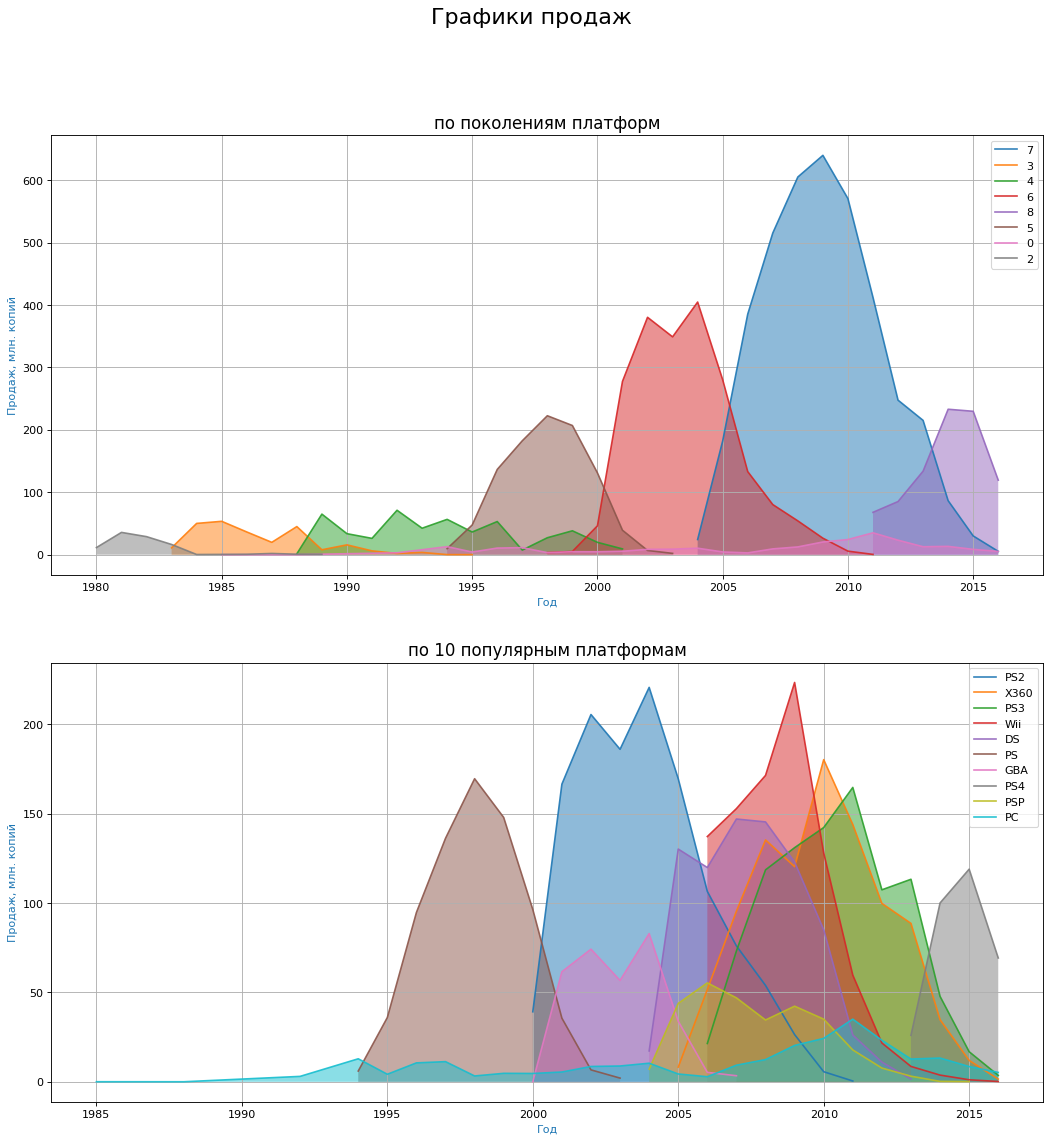

In [52]:
platform_pivot = df.pivot_table(index=['platform', 'year_released'], values='sales_total', aggfunc='sum')
platform_pivot = platform_pivot.reset_index()
gen_pivot = df.pivot_table(index=['gen', 'year_released'], values='sales_total', aggfunc='sum')
gen_pivot = gen_pivot.reset_index()

fig, ((ax0, ax1)) = plt.subplots(2, 1, figsize=(16, 16), dpi=80)
sns.color_palette()

#  график по поколениям 
for i in df['gen'].unique():
    x = gen_pivot.loc[gen_pivot['gen'] == i, 'year_released']
    y = gen_pivot.loc[gen_pivot['gen'] == i, 'sales_total']
    ax0.plot(x, y, alpha=.9, label=f'{i}')
    ax0.fill_between(x, y, interpolate=True, alpha=.5)
ax0.set_xlabel('Год', fontsize=10, color='tab:blue')
ax0.set_ylabel('Продаж, млн. копий', fontsize=10, color='tab:blue')
ax0.set_title('по поколениям платформ', fontsize=15)
ax0.legend()
ax0.grid(True)

#  график по топ10 платформ
for i in top10['platform'].unique():
    x = platform_pivot.loc[platform_pivot['platform'] == i, 'year_released']
    y = platform_pivot.loc[platform_pivot['platform'] == i, 'sales_total']
    ax1.plot(x, y, alpha=.9, label=f'{i}')
    ax1.fill_between(x, y, interpolate=True, alpha=.5)
ax1.set_xlabel('Год', fontsize=10, color='tab:blue')
ax1.set_ylabel('Продаж, млн. копий', fontsize=10, color='tab:blue')
ax1.set_title('по 10 популярным платформам', fontsize=15)
ax1.legend()
ax1.grid(True)

fig.suptitle('Графики продаж', fontsize=20)
plt.show()

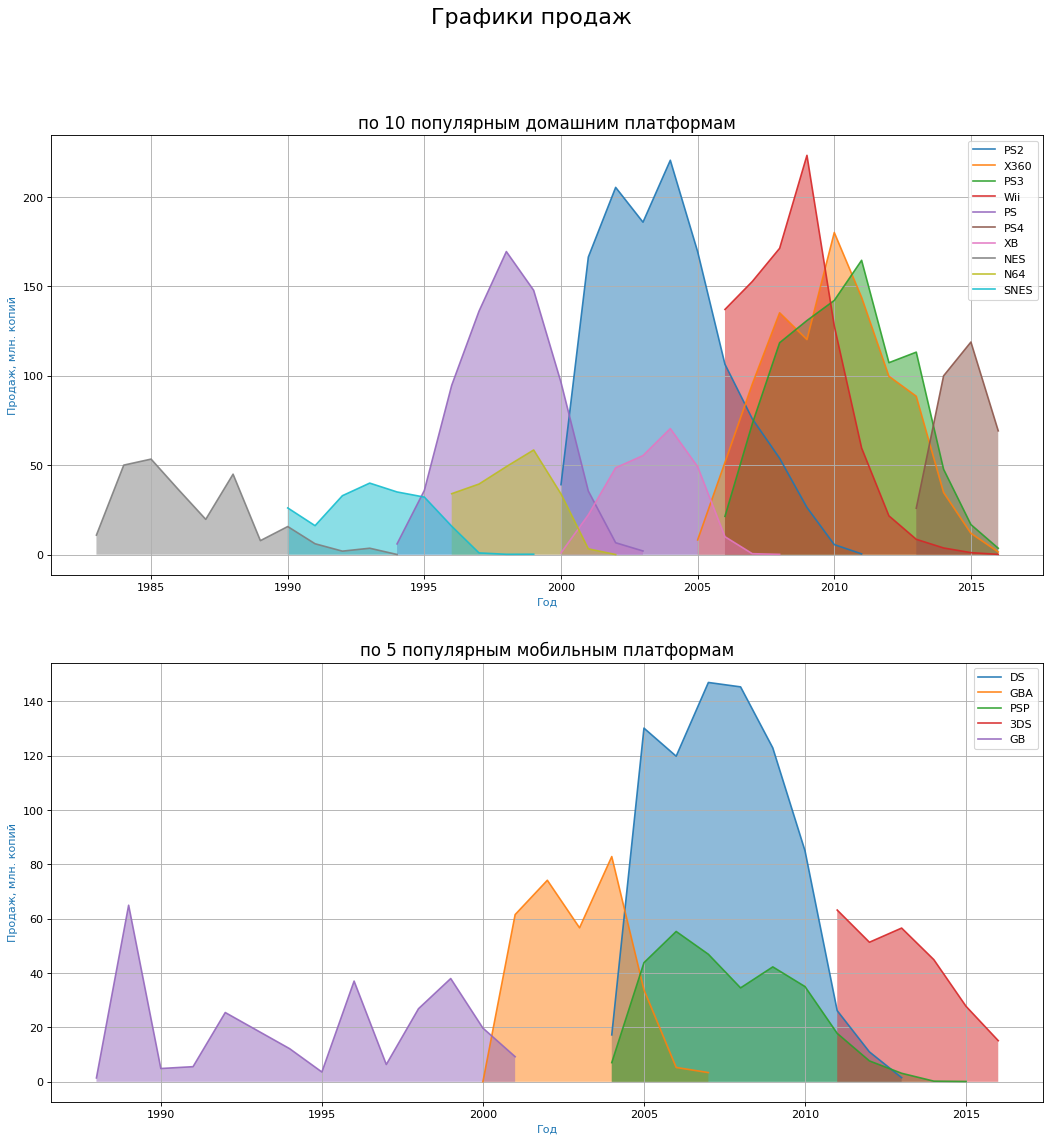

In [53]:
fig, ((ax0, ax1)) = plt.subplots(2, 1, figsize=(16, 16), dpi=80)
sns.color_palette()

#  график по топ10 домашних платформ
for i in top10_home['platform'].unique():
    x = platform_pivot.loc[platform_pivot['platform'] == i, 'year_released']
    y = platform_pivot.loc[platform_pivot['platform'] == i, 'sales_total']
    ax0.plot(x, y, alpha=.9, label=f'{i}')
    ax0.fill_between(x, y, interpolate=True, alpha=.5)
ax0.set_xlabel('Год', fontsize=10, color='tab:blue')
ax0.set_ylabel('Продаж, млн. копий', fontsize=10, color='tab:blue')
ax0.set_title('по 10 популярным домашним платформам', fontsize=15)
ax0.legend()
ax0.grid(True)

#  график по топ5 мобильных платформ
for i in top5_handheld['platform'].unique():
    x = platform_pivot.loc[platform_pivot['platform'] == i, 'year_released']
    y = platform_pivot.loc[platform_pivot['platform'] == i, 'sales_total']
    ax1.plot(x, y, alpha=.9, label=f'{i}')
    ax1.fill_between(x, y, interpolate=True, alpha=.5)
ax1.set_xlabel('Год', fontsize=10, color='tab:blue')
ax1.set_ylabel('Продаж, млн. копий', fontsize=10, color='tab:blue')
ax1.set_title('по 5 популярным мобильным платформам', fontsize=15)
ax1.legend()
ax1.grid(True)

fig.suptitle('Графики продаж', fontsize=20)
plt.show()

На графиках видно, что лучше всего продаются игры, вышедшие в середине жизненного цикла платформы (для PC не применимо). При этом на графике поколений чётко видно, что пик продаж приходится на те игры, которые вышли незадолго до появления нового поколения консолей. На графике с платформами также видны зависимости падения продаж после появления новых консолей, но не так чётко.

Это наверняка связано с переключением внимания и разработчиков, и игроков на новые консоли. Из-за этого самые продаваемые и ожидаемые тайтлы начинают выходить на новых поколениях платформ, а на старых выходит всё меньше игр.

Особняком в этой ситуации стоит PC, у которого нет поколений в строгом понимании этого слова. Поэтому все продажи на этой платформе сильно растянуты во времени.

[к началу шага](#3-2) | [к началу этапа](#3) | [к началу страницы](#top)

<a id="3-3"></a>
### Шаг 3.3 Какие платформы лидируют по продажам, растут или падают? 

Возьмём период для анализа в 10 лет, платформы последних 3-х поколений и ПК:

In [54]:
analisys = df.query('(platform == "PC" or platform in @top10.platform or gen in [6, 7, 8]) \
                    and year_released >= 2005 and platform != "DC"')
analisys.groupby(['platform', 'year_released']).agg({'name': 'count', 'sales_total': 'sum', 'sales_na': 'sum', 
                                                     'sales_eu': 'sum', 'sales_jp': 'sum', 'sales_other': 'sum', 
                                                     'critics_score': 'mean', 'users_score': 'mean'})
analisys_top = analisys.groupby('platform') \
                       .agg({'year_released': ['count', 'min', 'max'], 
                             'sales_total': 'sum', 
                             'sales_na': 'sum', 
                             'sales_eu': 'sum', 
                             'sales_jp': 'sum', 
                             'sales_other': 'sum', 
                             'critics_score': 'mean', 
                             'users_score': 'mean'})
analisys_top.columns = ['games_released', 'sales_start', 'sales_end', 'sales_total', 'sales_na', 'sales_eu', 'sales_jp', 
                        'sales_other', 'average_critics_score', 'average_users_score']
analisys_top = analisys_top.reset_index()
analisys_top['sales_period'] = analisys_top['sales_end'] - analisys_top['sales_start']

cols = ['platform', 'games_released', 'sales_start', 'sales_end', 'sales_period', 'sales_total', 'sales_na', 'sales_eu', 
        'sales_jp', 'sales_other', 'average_critics_score', 'average_users_score']
analisys_top = analisys_top[cols]

display(analisys_top)

print('Топ5 платформ по продажам игр в мире:', ', '.join(analisys_top.nlargest(5, 'sales_total')['platform'].unique()))
print('Топ5 платформ по продажам игр в Северной Америке:', ', '.join(analisys_top.nlargest(5, 'sales_na')['platform'].unique()))
print('Топ5 платформ по продажам игр в Европе:', ', '.join(analisys_top.nlargest(5, 'sales_eu')['platform'].unique()))
print('Топ5 платформ по продажам игр в Японии:', ', '.join(analisys_top.nlargest(5, 'sales_jp')['platform'].unique()))
print('Топ5 платформ по продажам игр в остальном мире:', ', '.join(analisys_top.nlargest(5, 'sales_other')['platform'].unique()))
print('Топ5 платформ по средней оценке игр критиками:', ', '.join(analisys_top.nlargest(5, 'average_critics_score')['platform'].unique()))
print('Топ5 платформ по средней оценке игр игроками:', ', '.join(analisys_top.nlargest(5, 'average_users_score')['platform'].unique()))

,platform,games_released,sales_start,sales_end,sales_period,sales_total,sales_na,sales_eu,sales_jp,sales_other,average_critics_score,average_users_score
0,3DS,520,2011,2016,5,259.00,83.49,61.48,100.67,13.36,66.369565,6.755435
1,DS,2127,2005,2013,8,788.83,374.07,184.96,171.90,57.90,64.110226,6.609695
2,GBA,180,2005,2007,2,42.54,26.85,10.19,4.78,0.72,65.932203,6.767797
3,GC,141,2005,2007,2,39.15,27.97,7.47,2.78,0.93,68.091743,7.193578
4,PC,830,2005,2016,11,171.55,47.03,105.08,0.00,19.44,74.644245,6.885501
5,PS2,1095,2005,2011,6,438.31,205.76,90.57,52.59,89.39,67.690037,7.346863
6,PS3,1329,2006,2016,10,939.65,393.49,330.29,80.19,135.68,69.601105,6.700442
7,PS4,392,2013,2016,3,314.14,108.74,141.09,15.96,48.35,71.961538,6.748462
8,PSP,1194,2005,2015,10,286.99,106.92,64.98,74.75,40.34,67.437759,7.037759
9,PSV,430,2011,2016,5,54.07,12.58,13.12,21.91,6.46,70.062500,7.333333


Топ5 платформ по продажам игр в мире: X360, PS3, Wii, DS, PS2
Топ5 платформ по продажам игр в Северной Америке: X360, Wii, PS3, DS, PS2
Топ5 платформ по продажам игр в Европе: PS3, X360, Wii, DS, PS4
Топ5 платформ по продажам игр в Японии: DS, 3DS, PS3, PSP, Wii
Топ5 платформ по продажам игр в остальном мире: PS3, PS2, X360, Wii, DS
Топ5 платформ по средней оценке игр критиками: PC, XOne, PS4, PSV, PS3
Топ5 платформ по средней оценке игр игроками: PS2, PSV, GC, XB, PSP


Также построим графики:

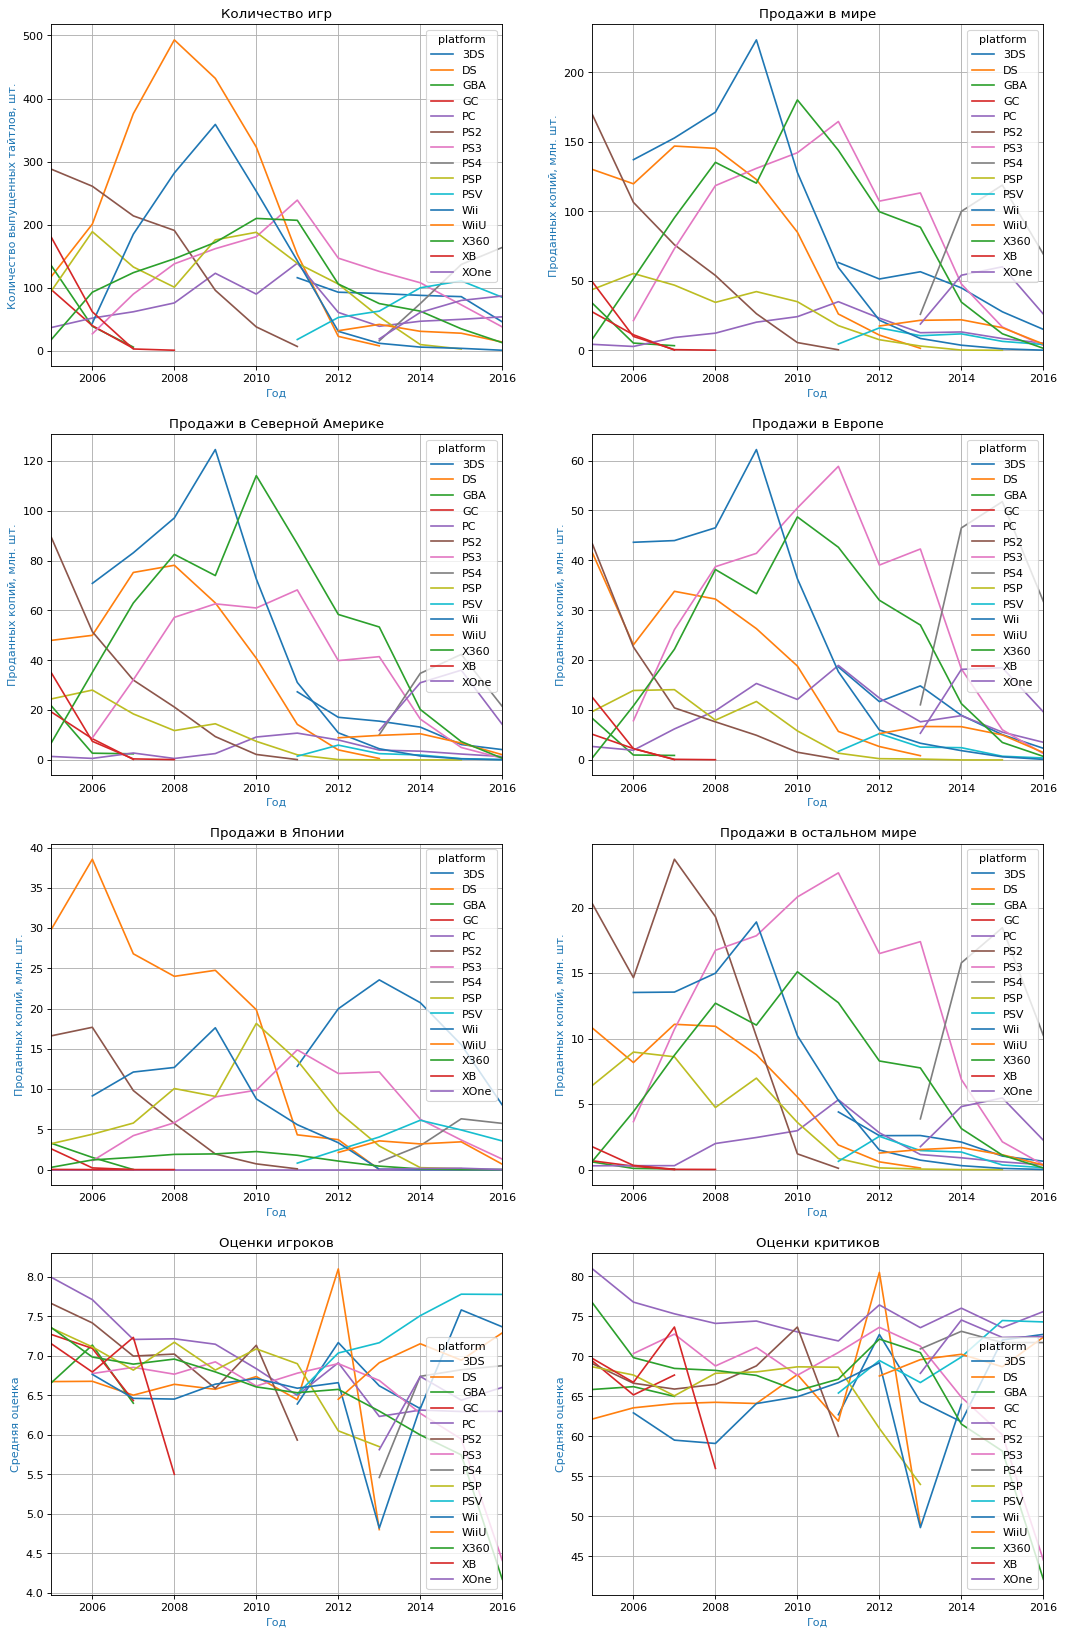

In [55]:
analisys_pivot = analisys.pivot_table(index=['platform', 'year_released'], 
                                values=['name', 'sales_total', 'sales_na', 'sales_eu', 'sales_jp', 'sales_other', 
                                        'critics_score', 'users_score'], 
                                aggfunc={'name': 'count', 'sales_total': 'sum', 'sales_na': 'sum', 
                                         'sales_eu': 'sum', 'sales_jp': 'sum', 'sales_other': 'sum', 
                                         'critics_score': 'mean', 'users_score': 'mean'})

fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7)) = plt.subplots(4, 2, figsize=(16, 26), dpi=80)

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7]
d = {'name': 'Количество игр', 
     'sales_total': 'Продажи в мире',
     'sales_na': 'Продажи в Северной Америке',
     'sales_eu': 'Продажи в Европе',
     'sales_jp': 'Продажи в Японии',
     'sales_other': 'Продажи в остальном мире',
     'users_score': 'Оценки игроков',
     'critics_score': 'Оценки критиков'}
yl_1, yl_2, yl_3 = 'Количество выпущенных тайтлов, шт.', 'Проданных копий, млн. шт.', 'Средняя оценка'
yl = [yl_1, yl_2, yl_2, yl_2, yl_2, yl_2, yl_3, yl_3]

i = 0
for key, value in d.items():
    analisys_pivot.reset_index().pivot('year_released','platform',key).plot(ax=axes[i], title=value, grid=True)
    axes[i].set_xlabel('Год', fontsize=10, color='tab:blue')
    axes[i].set_ylabel(yl[i], fontsize=10, color='tab:blue')
    i += 1

plt.show()

У нас получилась информация за 10 лет, включающая 15 игровых платформ.

Dreamcast пришлось удалить, так как в выборку попали игры, которые вышли уже после окончания жизненного цикла платформы.

С учётом измененного временного промежутка мировым лидером по продажам стала консоль XBox360, а общий лидер PS2 ушёл на 5-е место.

При этом видим, что в регионах своя специфика: крупный Североамериканский рынок патриотично вывел XBox 360 в лидеры, в других регионах эта платформа пользуется меньшей популярностью, ну а в Японии шайтан ящик даже не попал в топ 5.

Европейцы оказались самыми продвинутыми, в их топ5 уже попала свеженькая PS4. Остальные платформы такие же как в Америке, только порядок другой.

Японский рынок с одной стороны патриотичен &mdash; всё приставки в топе местного производства, с другой &mdash; оригинален, ведь первые два места заняли мобильные приставки!

Критикам больше нравятся игры на ПК и новых платформах, игроки лучше оценивали игры на старых платформах. При этом топ по оценкам никак не соотносится с топом продаж.

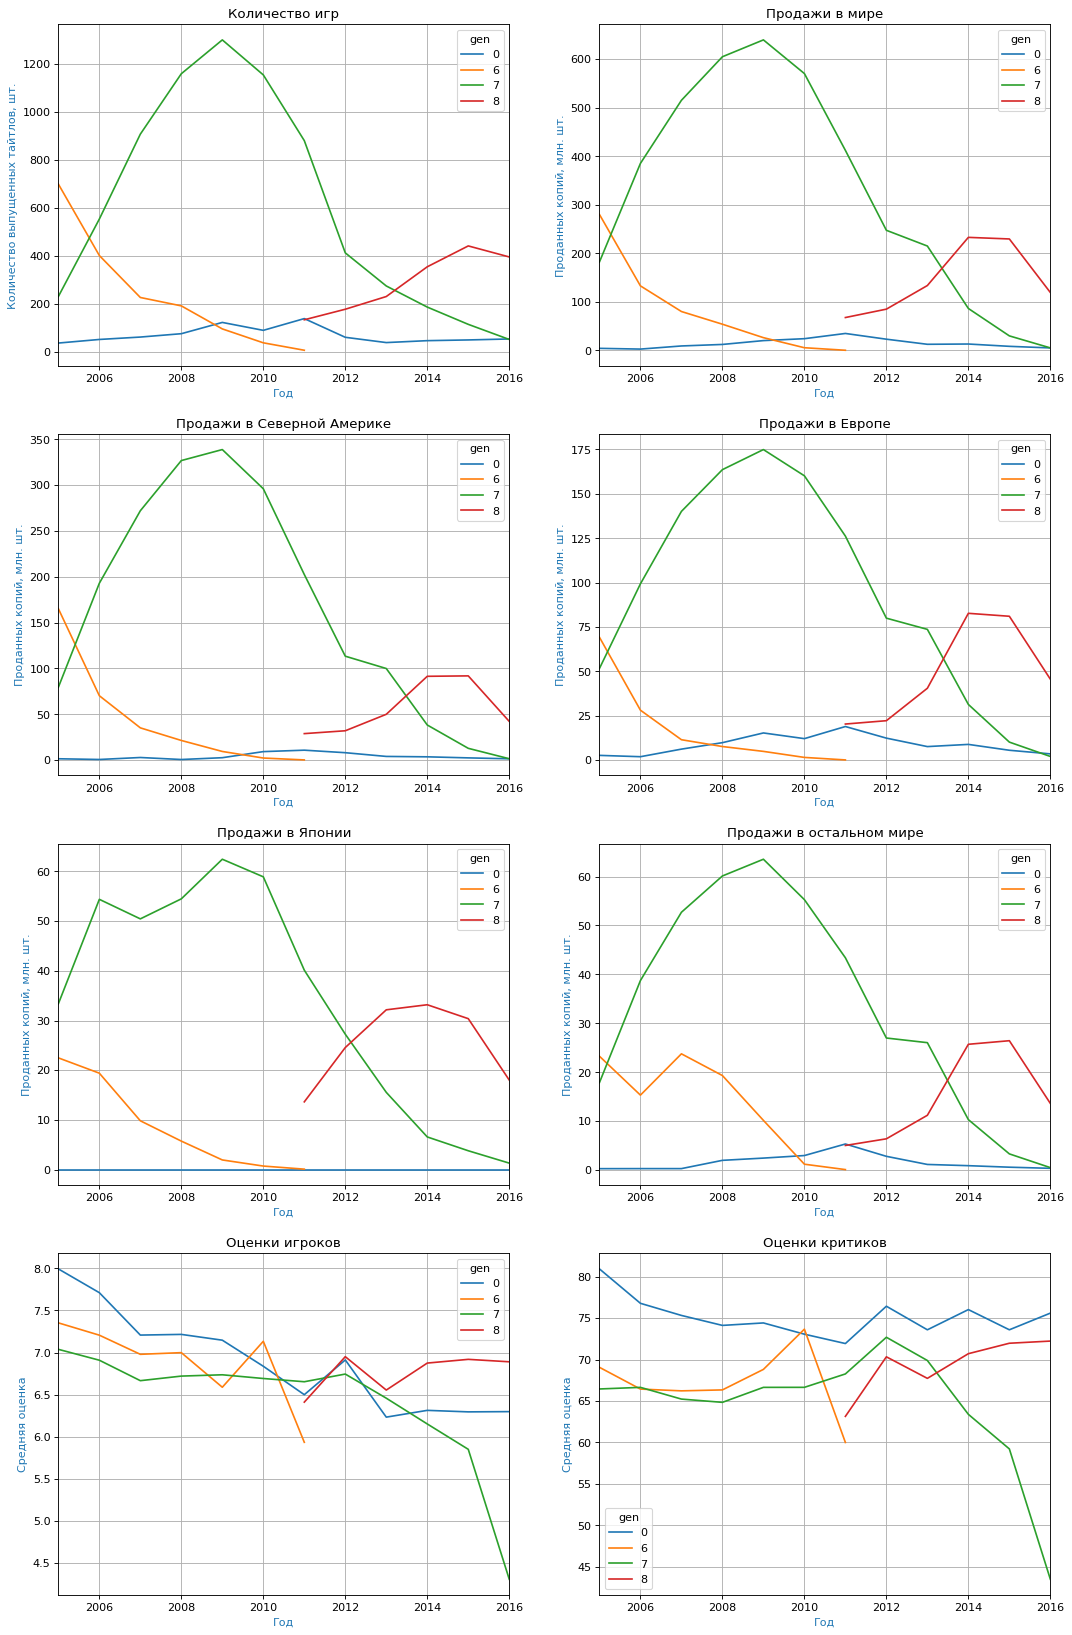

In [56]:
analisys_gen = df.query('year_released >= 2005')
analisys_gen.groupby(['gen', 'year_released']).agg({'name': 'count', 'sales_total': 'sum', 'sales_na': 'sum', 
                                                    'sales_eu': 'sum', 'sales_jp': 'sum', 'sales_other': 'sum', 
                                                    'critics_score': 'mean', 'users_score': 'mean'})
analisys_gen_pivot = analisys.pivot_table(index=['gen', 'year_released'], 
                                          values=['name', 'sales_total', 'sales_na', 'sales_eu', 'sales_jp', 'sales_other', 
                                                  'critics_score', 'users_score'], 
                                          aggfunc={'name': 'count', 'sales_total': 'sum', 'sales_na': 'sum', 
                                                   'sales_eu': 'sum', 'sales_jp': 'sum', 'sales_other': 'sum', 
                                                   'critics_score': 'mean', 'users_score': 'mean'})

fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7)) = plt.subplots(4, 2, figsize=(16, 26), dpi=80)

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7]
d = {'name': 'Количество игр', 
     'sales_total': 'Продажи в мире',
     'sales_na': 'Продажи в Северной Америке',
     'sales_eu': 'Продажи в Европе',
     'sales_jp': 'Продажи в Японии',
     'sales_other': 'Продажи в остальном мире',
     'users_score': 'Оценки игроков',
     'critics_score': 'Оценки критиков'}
yl_1, yl_2, yl_3 = 'Количество выпущенных тайтлов, шт.', 'Проданных копий, млн. шт.', 'Средняя оценка'
yl = [yl_1, yl_2, yl_2, yl_2, yl_2, yl_2, yl_3, yl_3]

i = 0
for key, value in d.items():
    analisys_gen_pivot.reset_index().pivot('year_released','gen',key).plot(ax=axes[i], title=value, grid=True)
    axes[i].set_xlabel('Год', fontsize=10, color='tab:blue')
    axes[i].set_ylabel(yl[i], fontsize=10, color='tab:blue')
    i += 1

plt.show()

На графиках по поколениям видим, что на новое поколение выходит заметно меньше игр. Возможно это связано с внедрением обратной совместимости с играми прошлых поколений.

По продажам видно, что весь мир (кроме Японии) выглядит практически одинаково. В Японии графики имеют те же тенденции, но выглядят иначе.

По оценкам так же лидирует PC, который в продажах явно не блещет.

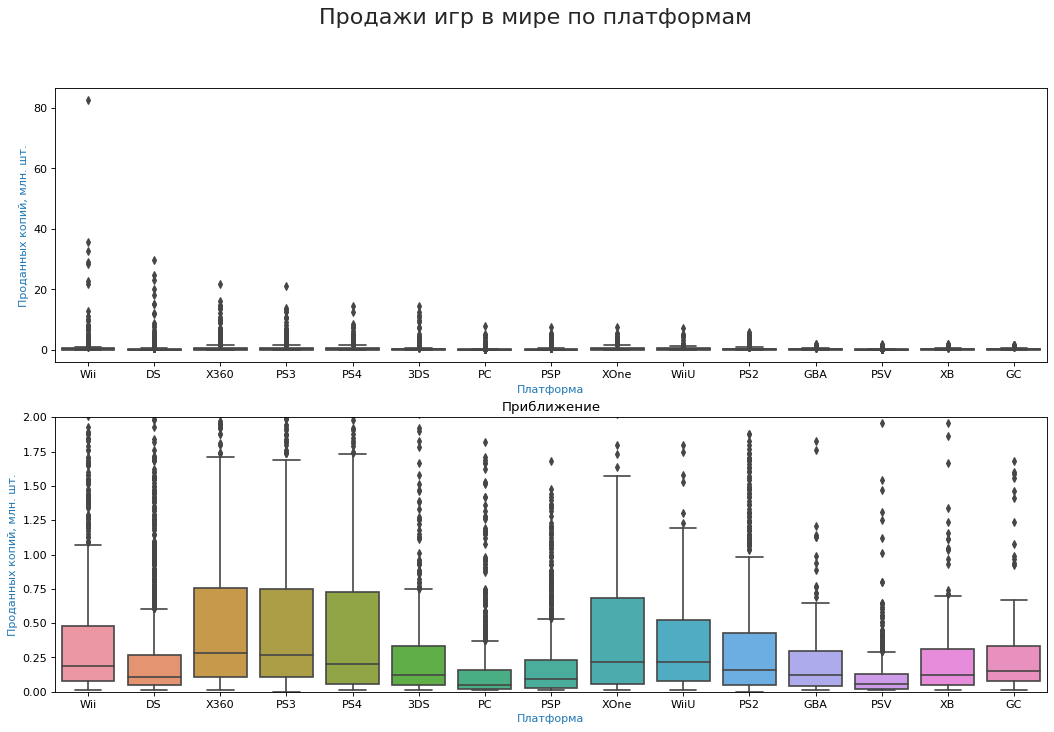

In [57]:
fig, ((ax0, ax1)) = plt.subplots(2, 1, figsize=(16, 10), dpi=80)
sns.set_style("whitegrid")

sns.boxplot(ax=ax0, x='platform', y='sales_total', data=analisys)
sns.boxplot(ax=ax1, x='platform', y='sales_total', data=analisys)

ax0.set_xlabel('Платформа', fontsize=10, color='tab:blue')
ax0.set_ylabel('Проданных копий, млн. шт.', fontsize=10, color='tab:blue')

ax1.set_xlabel('Платформа', fontsize=10, color='tab:blue')
ax1.set_ylabel('Проданных копий, млн. шт.', fontsize=10, color='tab:blue')
ax1.set_title('Приближение')
ax1.set_ylim([0, 2])

fig.suptitle('Продажи игр в мире по платформам', fontsize=20)
plt.show()

У платформы Wii есть рекорд по продажам одной игры, но это Wii Sports которая включена в комплект большинства приставок Wii. Но и кроме этого у Wii много отклоняющихся значений.

В среднем же, самыми успешными платформами являются последние два поколения платформ от Sony и Microsoft. Чуть хуже выступают Wii и WiiU. Остальные платформы продаются не так успешно.

[к началу шага](#3-3) | [к началу этапа](#3) | [к началу страницы](#top)

<a id="3-4"></a>
### Шаг 3.4 Как влияют на продажи отзывы пользователей и критиков? 

Как мы уже видели на графиках выше, связь между оценками критиков и игроков и продажами не такая уж и заметная. Проверим коэффициенты корреляции по этим параметрам для PS3 и для остальных платформ:

In [58]:
analisys_PS3 = analisys.copy()
analisys_PS3.loc[~(analisys_PS3['platform'] == 'PS3'), 'platform'] = 'other'

platforms = ['PS3', 'other']
keys = ['users_score', 'critics_score']
values = ['sales_total', 'sales_na', 'sales_eu', 'sales_jp', 'sales_other']

list_l = [[], [], [], [], []]

for v in range(len(values)):
    for key in keys:
        for platform in platforms:
            list_l[v].append(analisys_PS3.loc[analisys_PS3['platform'] == platform, key].corr(analisys_PS3.loc[analisys_PS3['platform'] == platform, values[v]]))
            
corr_df = pd.DataFrame(list_l)
corr_df.columns = pd.MultiIndex.from_product([['users_score', 'critics_score'], ['PS3', 'other']])
corr_df.index = ['sales_total', 'sales_na', 'sales_eu', 'sales_jp', 'sales_other']
corr_df            

users_score           critics_score          
                    PS3     other           PS3     other
sales_total    0.134129  0.090877      0.385480  0.190817
sales_na       0.144234  0.080812      0.409597  0.182938
sales_eu       0.091790  0.067799      0.329497  0.178608
sales_jp       0.175231  0.124259      0.202961  0.120975
sales_other    0.116869  0.087798      0.349990  0.189160

Так же построим графики корреляции:

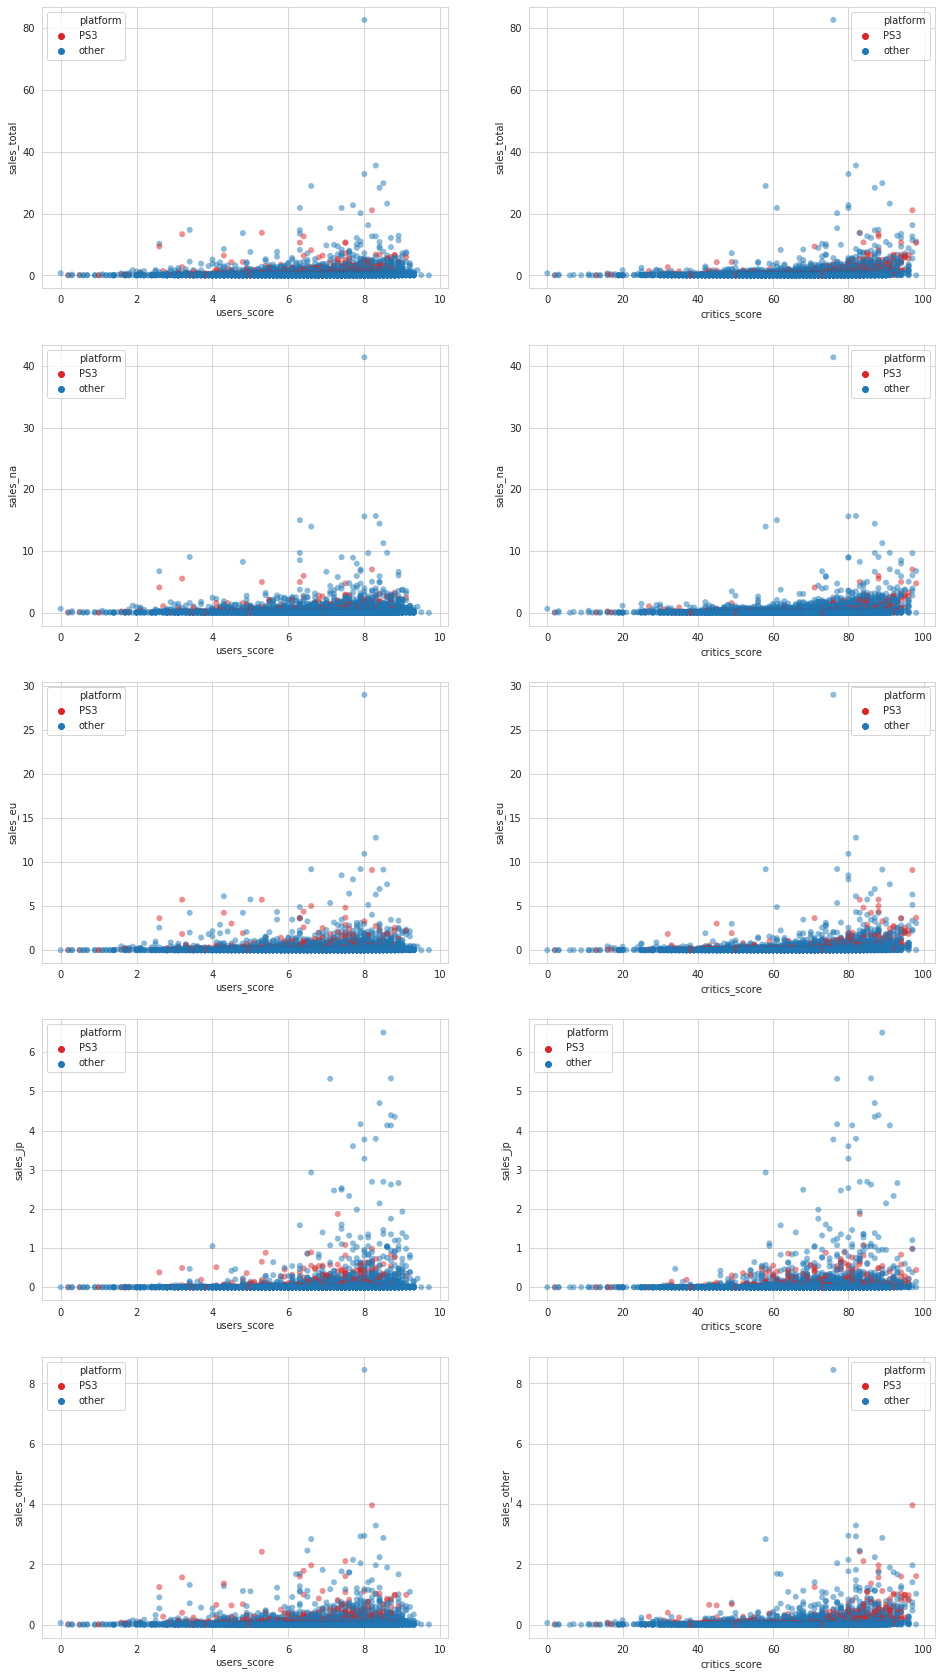

In [59]:
f, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7), (ax8, ax9)) = plt.subplots(5, 2, figsize=(16, 30))
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

i = 0
for value in values:
    for key in keys:
        sns.scatterplot(x=key, y=value, hue='platform',  hue_order=['PS3', 'other'], palette=['tab:red', 'tab:blue'], 
                        data=analisys_PS3, ax=axes[i], alpha=.5, linewidth=0)
        i += 1

plt.show()

Получается что оценки критиков и пользователей не так уж и сильно влияют на общий уровень продаж. 

Хорошие рейтинги не гарантируют игре высокие продажи. Однако низкие рейтинги практически всегда негативно влияют на уровень продаж.

[к началу шага](#3-4) | [к началу этапа](#3) | [к началу страницы](#top)

<a id="3-5"></a>
### Шаг 3.5 Выделяются ли жанры с высокими и низкими продажами?

Посмотрим как продажи распределены по жанрам:

In [60]:
analisys.groupby('genre')[['sales_total', 'sales_na', 'sales_eu', 'sales_jp', 'sales_other']].describe()

sales_total                                                 \
                   count      mean       std   min   25%    50%     75%   
genre                                                                     
Action            2615.0  0.467052  1.039877  0.01  0.06  0.170  0.4500   
Adventure         1070.0  0.140308  0.352656  0.01  0.02  0.040  0.1200   
Fighting           463.0  0.457322  0.915491  0.01  0.06  0.160  0.4900   
Misc              1395.0  0.449355  1.413616  0.01  0.05  0.130  0.3550   
Platform           428.0  0.710350  2.298513  0.01  0.08  0.180  0.5500   
Puzzle             404.0  0.274728  0.911386  0.01  0.03  0.090  0.1825   
Racing             653.0  0.548147  1.887828  0.00  0.06  0.170  0.4900   
Role-Playing      1081.0  0.512313  1.294791  0.01  0.06  0.150  0.4100   
Shooter            849.0  0.900718  1.913040  0.01  0.08  0.280  0.8300   
Simulation         660.0  0.411561  1.290237  0.01  0.04  0.130  0.3625   
Sports            1410.0  0.610936  2.629898  0.00  0.08  0.205  0.5475   
Strategy           432.0  0.185370  0.351431  0.01  0.03  0.080  0.2100   

                    sales_na                                                  \
                max    count      mean       std  min     25%    50%     75%   
genre                                                                          
Action        21.05   2615.0  0.225541  0.496864  0.0  0.0000  0.080  0.2200   
Adventure      5.55   1070.0  0.062486  0.186685  0.0  0.0000  0.000  0.0600   
Fighting      12.84    463.0  0.229978  0.477533  0.0  0.0000  0.070  0.2700   
Misc          28.91   1395.0  0.228344  0.739464  0.0  0.0000  0.070  0.1900   
Platform      29.80    428.0  0.350397  1.041684  0.0  0.0475  0.115  0.3125   
Puzzle        15.28    404.0  0.122748  0.267374  0.0  0.0100  0.050  0.1200   
Racing        35.52    653.0  0.252067  0.814738  0.0  0.0300  0.090  0.2400   
Role-Playing  18.24   1081.0  0.196679  0.539137  0.0  0.0000  0.040  0.1600   
Shooter       14.73    849.0  0.475913  1.068362  0.0  0.0400  0.140  0.3900   
Simulation    24.67    660.0  0.194652  0.459198  0.0  0.0000  0.070  0.2400   
Sports        82.54   1410.0  0.310461  1.288285  0.0  0.0200  0.110  0.3000   
Strategy       4.83    432.0  0.073472  0.195224  0.0  0.0000  0.000  0.0800   

                    sales_eu                                              \
                max    count      mean       std  min   25%    50%   75%   
genre                                                                      
Action         9.66   2615.0  0.144918  0.397169  0.0  0.00  0.030  0.13   
Adventure      3.28   1070.0  0.037336  0.134169  0.0  0.00  0.000  0.02   
Fighting       6.62    463.0  0.104190  0.234896  0.0  0.00  0.020  0.10   
Misc          15.00   1395.0  0.121190  0.477179  0.0  0.00  0.000  0.06   
Platform      14.44    428.0  0.204486  0.664396  0.0  0.00  0.035  0.15   
Puzzle         3.43    404.0  0.083911  0.349356  0.0  0.00  0.000  0.03   
Racing        15.68    653.0  0.199770  0.685107  0.0  0.01  0.030  0.16   
Role-Playing   6.38   1081.0  0.107299  0.352459  0.0  0.00  0.000  0.06   
Shooter        9.70    849.0  0.294912  0.644351  0.0  0.01  0.070  0.29   
Simulation     9.05    660.0  0.130591  0.569194  0.0  0.00  0.010  0.05   
Sports        41.36   1410.0  0.189660  0.986228  0.0  0.00  0.020  0.11   
Strategy       2.57    432.0  0.059699  0.153506  0.0  0.00  0.010  0.04   

                    sales_jp                                                  \
                max    count      mean       std  min  25%   50%   75%   max   
genre                                                                          
Action         9.09   2615.0  0.041839  0.145516  0.0  0.0  0.00  0.03  3.96   
Adventure      2.00   1070.0  0.028271  0.060099  0.0  0.0  0.01  0.03  0.84   
Fighting       2.55    463.0  0.068855  0.198777  0.0  0.0  0.02  0.07  2.66   
Misc           9.20   1395.0  0.052746  0.241429  0.0  0.0  0.00 

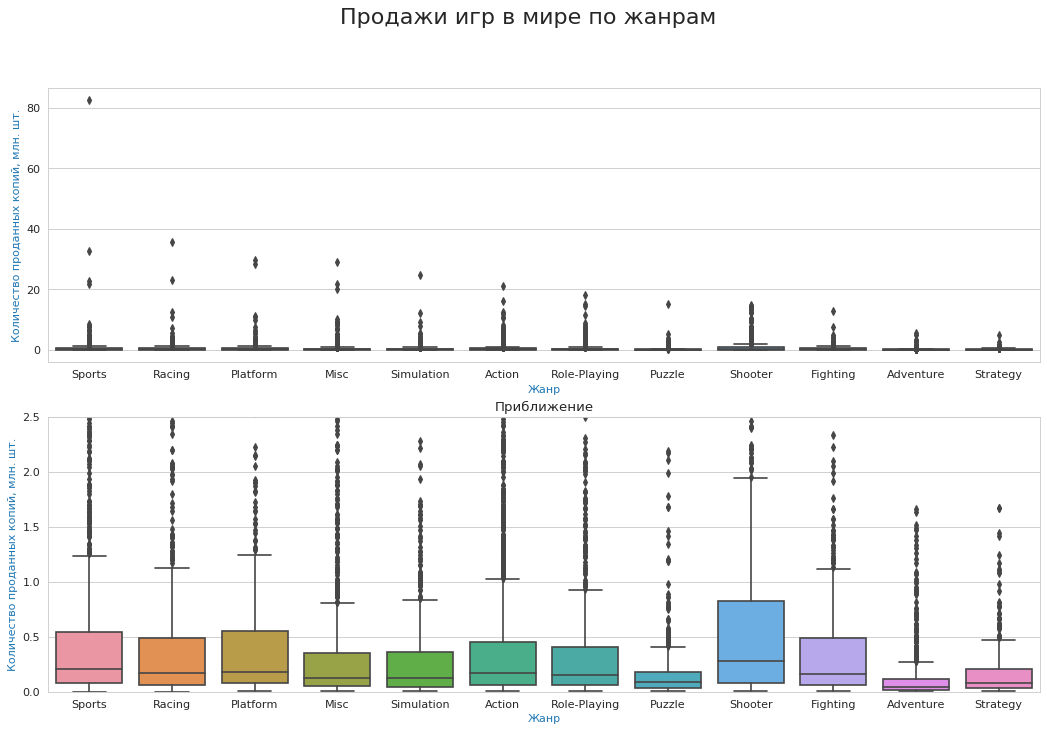

In [61]:
fig, ((ax0, ax1)) = plt.subplots(2, 1, figsize=(16, 10), dpi=80)
sns.set_style("whitegrid")

sns.boxplot(ax=ax0, x='genre', y='sales_total', data=analisys)
sns.boxplot(ax=ax1, x='genre', y='sales_total', data=analisys)

ax0.set_xlabel('Жанр', fontsize=10, color='tab:blue')
ax0.set_ylabel('Количество проданных копий, млн. шт.', fontsize=10, color='tab:blue')

ax1.set_xlabel('Жанр', fontsize=10, color='tab:blue')
ax1.set_ylabel('Количество проданных копий, млн. шт.', fontsize=10, color='tab:blue')
ax1.set_title('Приближение')
ax1.set_ylim([0, 2.5])

fig.suptitle('Продажи игр в мире по жанрам', fontsize=20)
plt.show()

Самые продаваемые игры относятся к шутерам, платформерам, файтингам, гонкам и спортивным играм. Адвенчуры, паззлы и стратегии достаточно специфичные жанры и продаются не так хорошо.

[к началу шага](#3-5) | [к началу этапа](#3) | [к началу страницы](#top)

<a id="3-6"></a>
### Шаг 3.6 Выводы по третьему этапу

На этом этапе мы проанализировали данные и сделали некоторые предварительные выводы. Мы:
- выяснили, сколько игр выпускалось в разные годы;
- узнали, как менялись продажи по платформам. 
- отобрали платформы с наибольшими суммарными продажами и нашли медианное время жизни платформы;
- узнали какие платформы лидируют по продажам;
- проверили, как влияют на продажи отзывы пользователей и критиков;
- выделили жанры с высокими и низкими продажами.

[к началу шага](#3-6) | [к началу этапа](#3) | [к началу страницы](#top)

<a id="4"></a>
## Этап 4. Портреты пользователей

Чтобы составить портреты пользователей, выведем информацию по каждому в отдельный датафрейм:

In [62]:
na_df = analisys[['name', 'platform', 'platform_type', 'gen', 'year_released', 'decade', 'genre', 'sales_na', 'critics_score', 
            'users_score', 'age_rating', 'age_rating_num']]
eu_df = analisys[['name', 'platform', 'platform_type', 'gen', 'year_released', 'decade', 'genre', 'sales_eu', 'critics_score', 
            'users_score', 'age_rating', 'age_rating_num']]
jp_df = analisys[['name', 'platform', 'platform_type', 'gen', 'year_released', 'decade', 'genre', 'sales_jp', 'critics_score', 
            'users_score', 'age_rating', 'age_rating_num']]

<a id="4-1"></a>
### Шаг 4.1 Потрет пользователя из Северной Америки

Посмотрим на портрет пользователя из Северной Америки:

In [63]:
print('Топ5 платформ: {}'.format(', '.join(na_df.groupby('platform')['sales_na'].sum().nlargest(5).index)))
print('Топ5 жанров: {}'.format(', '.join(na_df.groupby('genre')['sales_na'].sum().nlargest(5).index)))
print('Корреляция продаж и возрастной категории: {:.4f}'.format(na_df['age_rating_num'].corr(na_df['sales_na'])))

Топ5 платформ: X360, Wii, PS3, DS, PS2
Топ5 жанров: Action, Sports, Shooter, Misc, Role-Playing
Корреляция продаж и возрастной категории: 0.0364


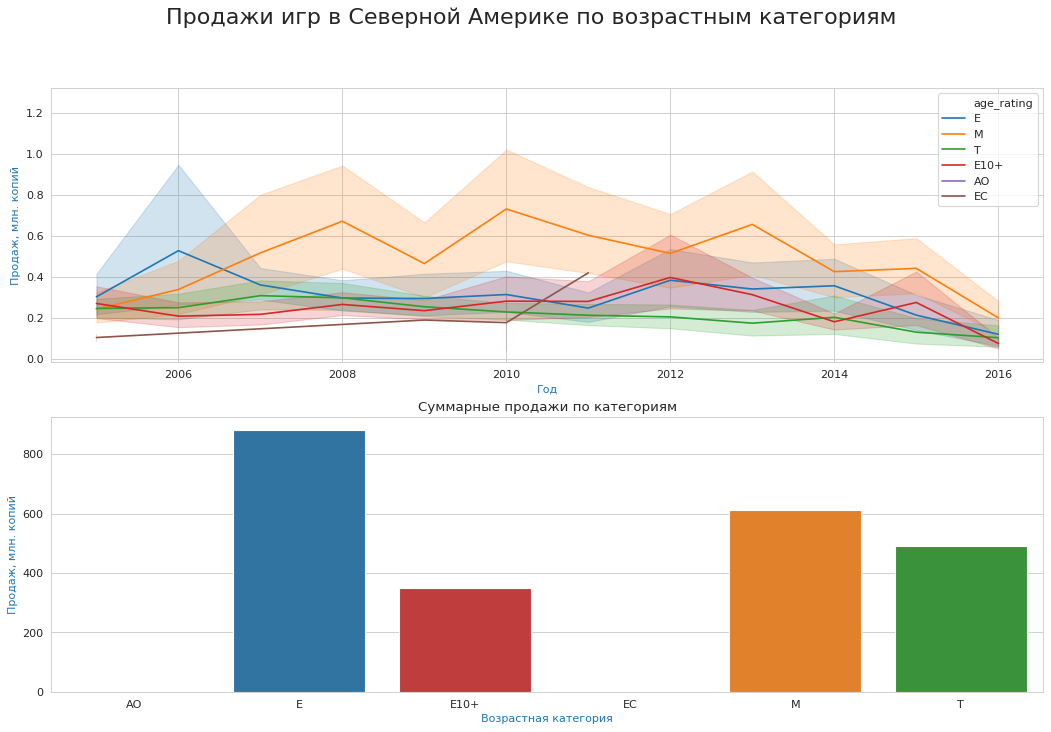

In [64]:
fig, ((ax0, ax1)) = plt.subplots(2, 1, figsize=(16, 10), dpi=80)
sns.set_style("whitegrid")

unique = ['E', 'M', 'T', 'E10+', 'AO', 'EC']
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

sns.lineplot(ax=ax0, x='year_released', y='sales_na',  hue = 'age_rating', data=na_df, palette=palette)
sns.barplot(ax=ax1, x='age_rating', y='sales_na', data=na_df.groupby('age_rating').sum().reset_index(), palette=palette)

ax0.set_xlabel('Год', fontsize=10, color='tab:blue')
ax0.set_ylabel('Продаж, млн. копий', fontsize=10, color='tab:blue')

ax1.set_xlabel('Возрастная категория', fontsize=10, color='tab:blue')
ax1.set_ylabel('Продаж, млн. копий', fontsize=10, color='tab:blue')
ax1.set_title('Суммарные продажи по категориям')

fig.suptitle('Продажи игр в Северной Америке по возрастным категориям', fontsize=20)
plt.show()

Как мы уже узнали,в Северной Америке популярны XBox 360, Wii, PS3, Nintendo DS и PS2 &mdash; игры именно этих платформ лучше всего продавались за последние 10 лет. 

Самые популярные жанры:  Action, Sports, Shooter, Misc, Role-Playing. При этом жанры Action, Misc и Role-Playing не входят в мировой топ5.

Больше всего в Америке продаются игры возрастных категорий Everyone и Mature, что вполне соответствует популярным жанрам.

[к началу шага](#4-1) | [к началу этапа](#4) | [к началу страницы](#top)

<a id="4-2"></a>
### Шаг 4.2 Потрет пользователя из Европы

Теперь посмотрим как дела обстоят в Европе:

In [65]:
print('Топ5 платформ: {}'.format(', '.join(eu_df.groupby('platform')['sales_eu'].sum().nlargest(5).index)))
print('Топ5 жанров: {}'.format(', '.join(eu_df.groupby('genre')['sales_eu'].sum().nlargest(5).index)))
print('Корреляция продаж и возрастной категории: {:.4f}'.format(eu_df['age_rating_num'].corr(eu_df['sales_eu'])))

Топ5 платформ: PS3, X360, Wii, DS, PS4
Топ5 жанров: Action, Sports, Shooter, Misc, Racing
Корреляция продаж и возрастной категории: 0.0484


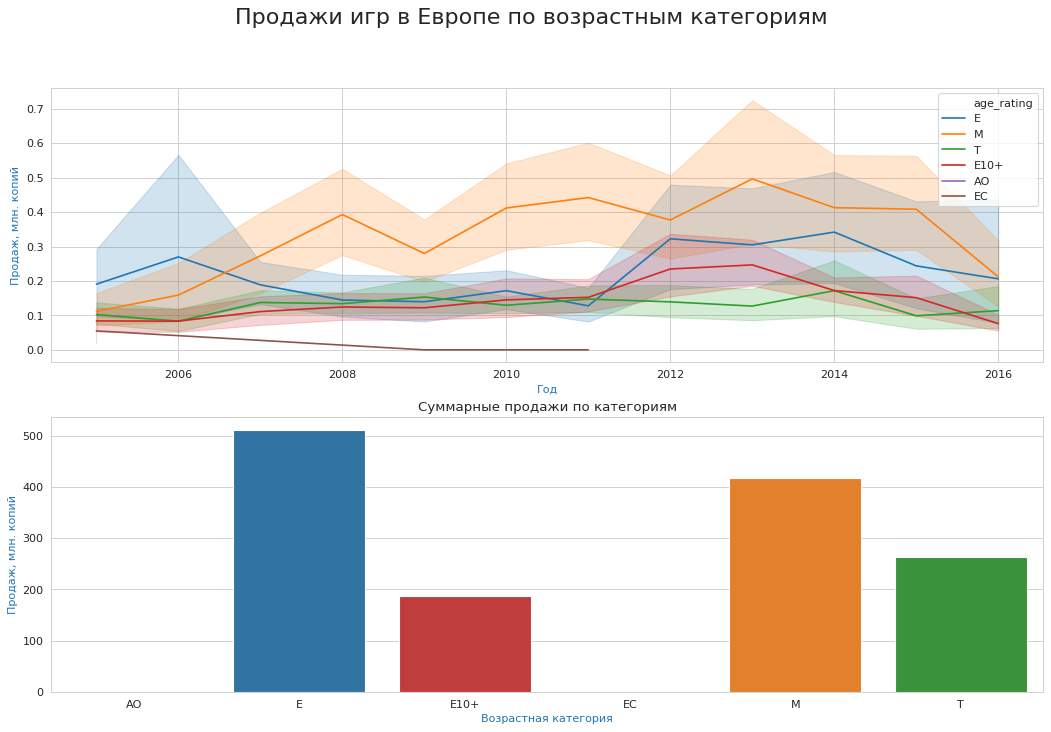

In [66]:
fig, ((ax0, ax1)) = plt.subplots(2, 1, figsize=(16, 10), dpi=80)
sns.set_style("whitegrid")

unique = ['E', 'M', 'T', 'E10+', 'AO', 'EC']
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

sns.lineplot(ax=ax0, x='year_released', y='sales_eu',  hue = 'age_rating', data=eu_df, palette=palette)
sns.barplot(ax=ax1, x='age_rating', y='sales_eu', data=eu_df.groupby('age_rating').sum().reset_index(), palette=palette)

ax0.set_xlabel('Год', fontsize=10, color='tab:blue')
ax0.set_ylabel('Продаж, млн. копий', fontsize=10, color='tab:blue')

ax1.set_xlabel('Возрастная категория', fontsize=10, color='tab:blue')
ax1.set_ylabel('Продаж, млн. копий', fontsize=10, color='tab:blue')
ax1.set_title('Суммарные продажи по категориям')

fig.suptitle('Продажи игр в Европе по возрастным категориям', fontsize=20)
plt.show()

Мы уже установили, что в Европе популярны PS3, X360, Wii, DS и PS4.


В топе жанров: Action, Sports, Shooter, Misc и Racing, от Америки отличается только последняя позиция (Racing вместо Role-Playing).

Распределение по возрастным категориям тоже мало отличается от американского рынка (с поправкой на меньшие объемы и наличие собственных рейтинговых организаций).

[к началу шага](#4-2) | [к началу этапа](#4) | [к началу страницы](#top)

<a id="4-3"></a>
### Шаг 4.3 Потрет пользователя из Японии

Напоследок заскочим в Японию:

In [67]:
print('Топ5 платформ: {}'.format(', '.join(jp_df.groupby('platform')['sales_jp'].sum().nlargest(5).index)))
print('Топ5 жанров: {}'.format(', '.join(jp_df.groupby('genre')['sales_jp'].sum().nlargest(5).index)))
print('Корреляция продаж и возрастной категории: {:.4f}'.format(jp_df['age_rating_num'].corr(jp_df['sales_jp'])))

Топ5 платформ: DS, 3DS, PS3, PSP, Wii
Топ5 жанров: Role-Playing, Action, Misc, Sports, Platform
Корреляция продаж и возрастной категории: -0.0220


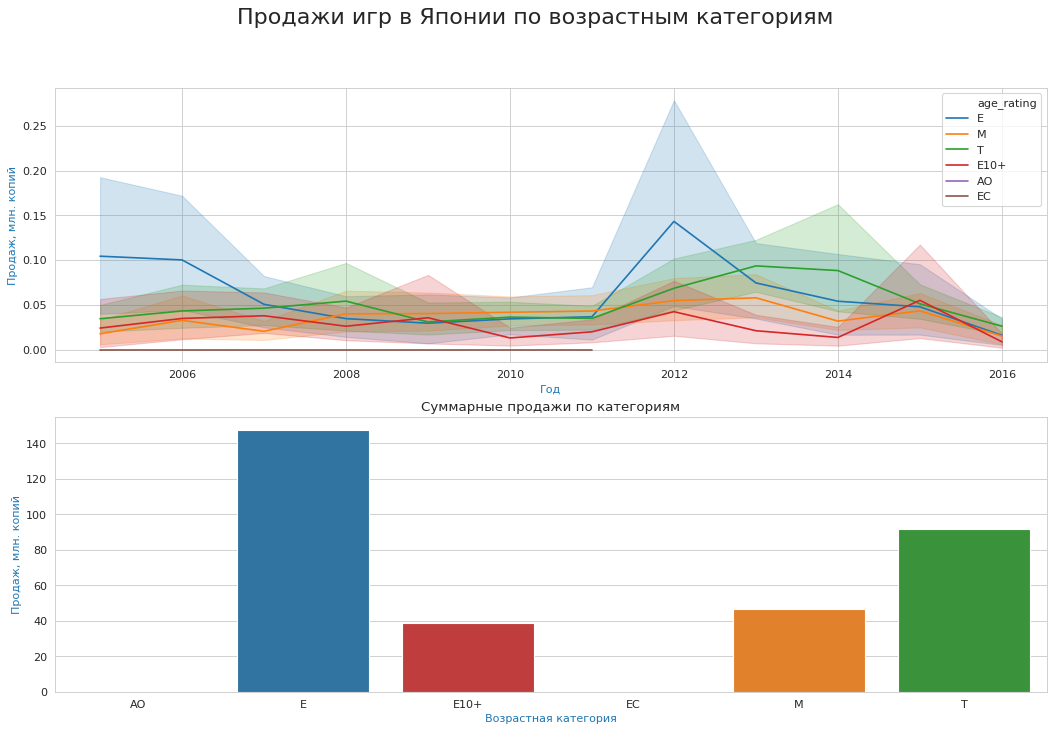

In [68]:
fig, ((ax0, ax1)) = plt.subplots(2, 1, figsize=(16, 10), dpi=80)
sns.set_style("whitegrid")

unique = ['E', 'M', 'T', 'E10+', 'AO', 'EC']
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

sns.lineplot(ax=ax0, x='year_released', y='sales_jp',  hue = 'age_rating', data=jp_df, palette=palette)
sns.barplot(ax=ax1, x='age_rating', y='sales_jp', data=jp_df.groupby('age_rating').sum().reset_index(), palette=palette)

ax0.set_xlabel('Год', fontsize=10, color='tab:blue')
ax0.set_ylabel('Продаж, млн. копий', fontsize=10, color='tab:blue')

ax1.set_xlabel('Возрастная категория', fontsize=10, color='tab:blue')
ax1.set_ylabel('Продаж, млн. копий', fontsize=10, color='tab:blue')
ax1.set_title('Суммарные продажи по категориям')

fig.suptitle('Продажи игр в Японии по возрастным категориям', fontsize=20)
plt.show()

Если Американцы и Европейцы во многом схожи, то Японцы, наоборот, показывают свою уникальность и обособленность.

Мы уже установили, что у них в топе уникальный набор приставок: DS, 3DS, PS3, PSP, Wii. Все приставки японские, а первые две &mdash; ещё и портативные.

Жанры тоже своеобразные: Role-Playing, Action, Misc, Sports, Platform. На первом месте оказались ролевые игры, а более популярные в мире Sports и Platform замыкают пятёрку.

По предпочитаемым возрастным категориям японские пользователи тоже отличаются. С одной стороны, это связано с другим распределением популярных жанров и культурными особенностями, а с другой &mdash; с наличием собственного рейтингового агентства. Значительная часть игр выпускается для внутреннего рынка и не оценивается ESRB. Самая популярная категория &mdash; Everyone, как и во всём мире, а на второе место вышла категория Teen. Вероятно в Японии большая часть геймеров - несовершеннолетние.

[к началу шага](#4-3) | [к началу этапа](#4) | [к началу страницы](#top)

<a id="4-4"></a>
### Шаг 4.4 Выводы по четвёртому этапу

На этом этапе мы составили портреты пользователей из Америки, Европы и Японии. Оказалось, что игроки из Северной Америки и Европы достаточно схожи в своих предпочтениях. А вот вкусы японских пользователей специфичны.

[к началу шага](#4-4) | [к началу этапа](#4) | [к началу страницы](#top)

<a id="5"></a>
## Этап 5. Проверка гипотез

<a id="5-1"></a>
### Шаг 5.1 Средние пользовательские рейтинги игр платформ Xbox One и PC не различаются

Теперь проверим гипотезы. Для начала сформулируем нулевую гипотезу &mdash; средние пользовательские рейтинги платформ Xbox&nbsp;One и PC равны. Соответственно альтернативной гипотезой будет их неравенство.

Построим графики:

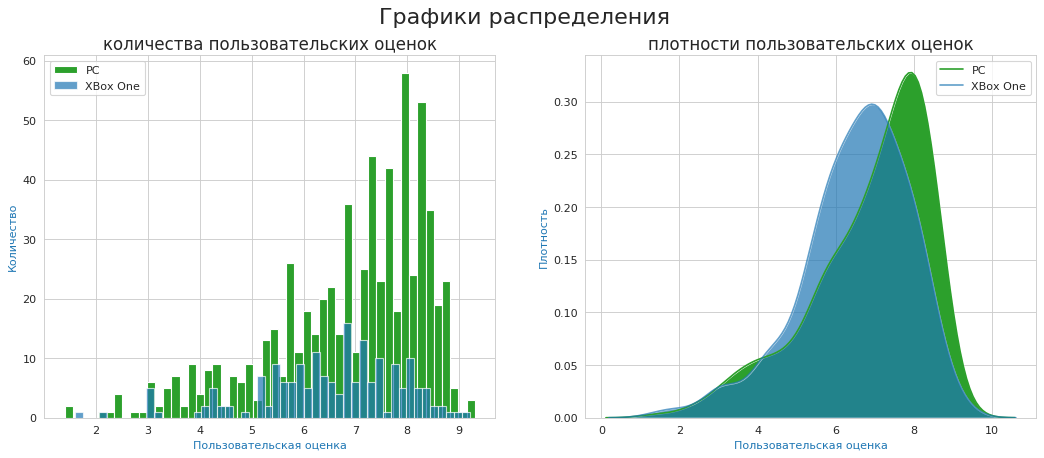

In [69]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,6), dpi=80)

xone = analisys.loc[(analisys['platform'] == 'XOne') & ~(analisys['users_score'].isnull()), 'users_score']
pc = analisys.loc[(analisys['platform'] == 'PC') & ~(analisys['users_score'].isnull()), 'users_score']

#  гистограмма по звонкам без 0
ax0.hist(pc, 50, facecolor='tab:green', alpha=1, label='PC')
ax0.hist(xone, 50, facecolor='tab:blue', alpha=.7, label='XBox One')
ax0.set_xlabel('Пользовательская оценка', fontsize=10, color='tab:blue')
ax0.set_ylabel('Количество', fontsize=10, color='tab:blue')
ax0.set_title('количества пользовательских оценок', fontsize=15)
ax0.legend()
ax0.grid(True)

#  гистограмма по звонкам с 0
sns.kdeplot(pc, ax=ax1, shade=True, color='tab:green', label='PC', alpha=1)
sns.kdeplot(xone, ax=ax1, shade=True, color='tab:blue', label='XBox One', alpha=.7)
ax1.set_xlabel('Пользовательская оценка', fontsize=10, color='tab:blue')
ax1.set_ylabel('Плотность', fontsize=10, color='tab:blue')
ax1.set_title('плотности пользовательских оценок', fontsize=15)
ax1.legend()
ax1.grid(True)

fig.suptitle('Графики распределения', fontsize=20)
plt.show()

Гистограммы различаются достаточно сильно, а графики плотности распределения похожи, но всё равно достаточно различаются. 

Проверим гипотезу с помощью сравнения самих совокупностей. Возьмём α=.05 и предварительно сравним дисперсии выборок:

In [70]:
alpha = .05
e_var = abs((np.var(xone) - np.var(pc)) / np.var(pc))
equal = e_var < alpha

results = st.ttest_ind(xone, pc, equal_var=e_var)

print('различие выборок: {:.4%}'.format(e_var))
print('p-значение: {}'.format(results.pvalue))

if (results.pvalue < alpha):
    print('Гипотеза не подтвердилась: cредние пользовательские рейтинги платформ различаются')
else:
    print('Гипотеза подтвердилась: cредние пользовательские рейтинги платформ не различаются')

различие выборок: 17.1232%
p-значение: 0.002340408115156975
Гипотеза не подтвердилась: cредние пользовательские рейтинги платформ различаются


Нулевая гипотеза не подтвердилась: средние пользовательские рейтинги игр на XBox One и PC различаются.

[к началу шага](#5-1) | [к началу этапа](#5) | [к началу страницы](#top)

<a id="5-2"></a>
### Шаг 5.2 Средние пользовательские рейтинги игр жанров Action и Sports не различаются

Теперь проверим гипотезу для жанров. Сформулируем нулевую гипотезу &mdash; средние пользовательские рейтинги жанров Action и Sports равны. Соответственно альтернативной гипотезой будет их неравенство.

Построим графики:

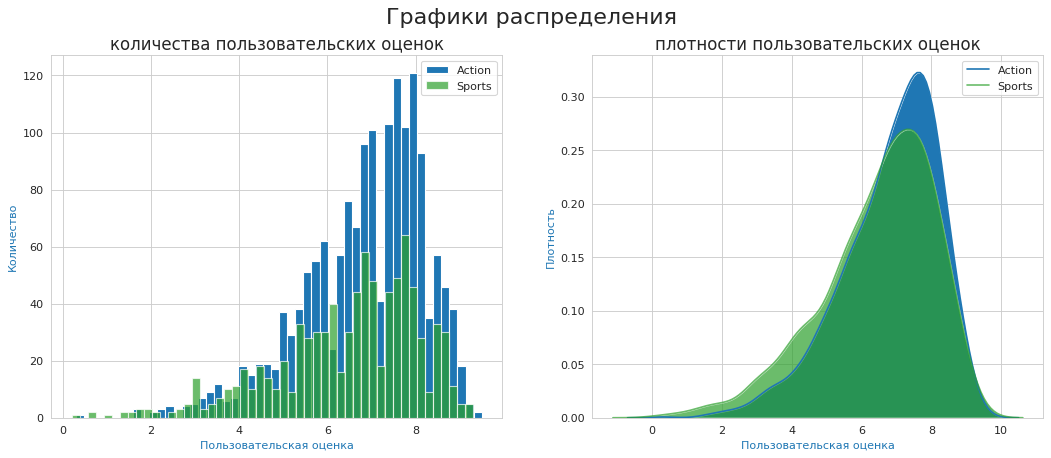

In [71]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,6), dpi=80)

action = analisys.loc[(analisys['genre'] == 'Action') & ~(analisys['users_score'].isnull()), 'users_score']
sports = analisys.loc[(analisys['genre'] == 'Sports') & ~(analisys['users_score'].isnull()), 'users_score']

#  гистограмма по звонкам без 0
ax0.hist(action, 50, facecolor='tab:blue', alpha=1, label='Action')
ax0.hist(sports, 50, facecolor='tab:green', alpha=.7, label='Sports')
ax0.set_xlabel('Пользовательская оценка', fontsize=10, color='tab:blue')
ax0.set_ylabel('Количество', fontsize=10, color='tab:blue')
ax0.set_title('количества пользовательских оценок', fontsize=15)
ax0.legend()
ax0.grid(True)

#  гистограмма по звонкам с 0
sns.kdeplot(action, ax=ax1, shade=True, color='tab:blue', label='Action', alpha=1)
sns.kdeplot(sports, ax=ax1, shade=True, color='tab:green', label='Sports', alpha=.7)
ax1.set_xlabel('Пользовательская оценка', fontsize=10, color='tab:blue')
ax1.set_ylabel('Плотность', fontsize=10, color='tab:blue')
ax1.set_title('плотности пользовательских оценок', fontsize=15)
ax1.legend()
ax1.grid(True)

fig.suptitle('Графики распределения', fontsize=20)
plt.show()

Графики в этом случае похожи больше, но отличия всё еще видны.

Проверим гипотезу с помощью сравнения самих совокупностей. Возьмём α=.05 и предварительно сравним дисперсии выборок:

In [72]:
alpha = .05
e_var = abs((np.var(action) - np.var(sports)) / np.var(sports))
equal = e_var < alpha

results = st.ttest_ind(action, sports, equal_var=e_var)

print('различие выборок: {:.4%}'.format(e_var))
print('p-значение: {}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Гипотеза не подтвердилась: cредние пользовательские рейтинги жанров различаются")
else:
    print("Гипотеза подтвердилась: cредние пользовательские рейтинги жанров не различаются")

различие выборок: 26.2895%
p-значение: 4.652180348443304e-09
Гипотеза не подтвердилась: cредние пользовательские рейтинги жанров различаются


Оказалось, что нулевая гипотеза не подтвердилась.

А что, если проанализировать весь датасет?

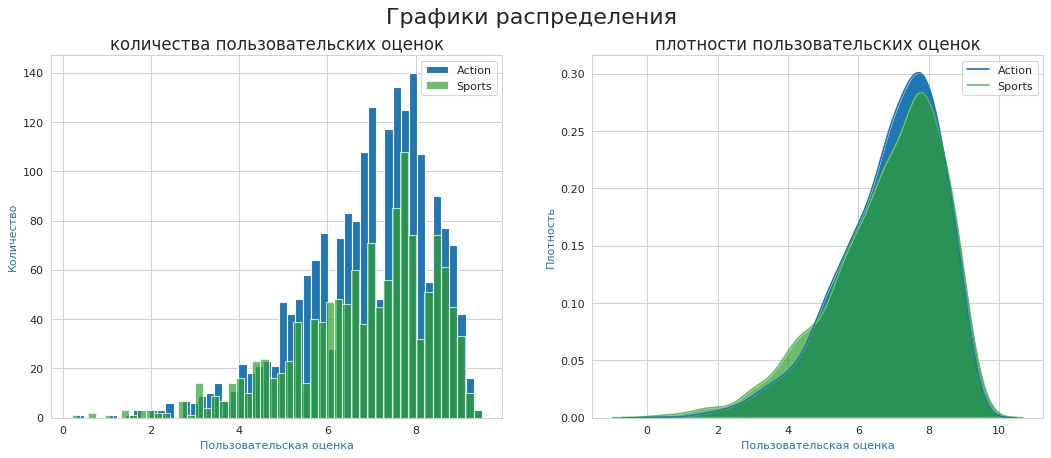

In [73]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16,6), dpi=80)

action = df.loc[(df['genre'] == 'Action') & ~(df['users_score'].isnull()), 'users_score']
sports = df.loc[(df['genre'] == 'Sports') & ~(df['users_score'].isnull()), 'users_score']

#  гистограмма по звонкам без 0
ax0.hist(action, 50, facecolor='tab:blue', alpha=1, label='Action')
ax0.hist(sports, 50, facecolor='tab:green', alpha=.7, label='Sports')
ax0.set_xlabel('Пользовательская оценка', fontsize=10, color='tab:blue')
ax0.set_ylabel('Количество', fontsize=10, color='tab:blue')
ax0.set_title('количества пользовательских оценок', fontsize=15)
ax0.legend()
ax0.grid(True)

#  гистограмма по звонкам с 0
sns.kdeplot(action, ax=ax1, shade=True, color='tab:blue', label='Action', alpha=1)
sns.kdeplot(sports, ax=ax1, shade=True, color='tab:green', label='Sports', alpha=.7)
ax1.set_xlabel('Пользовательская оценка', fontsize=10, color='tab:blue')
ax1.set_ylabel('Плотность', fontsize=10, color='tab:blue')
ax1.set_title('плотности пользовательских оценок', fontsize=15)
ax1.legend()
ax1.grid(True)

fig.suptitle('Графики распределения', fontsize=20)
plt.show()

В этом случае графики плотности очень похожи, а гистограммы всё ещё различаются.

А что выдаст проверка?

In [74]:
alpha = .05
e_var = abs((np.var(action) - np.var(sports)) / np.var(sports))
equal = e_var < alpha

results = st.ttest_ind(action, sports, equal_var=e_var)

print('различие выборок: {:.4%}'.format(e_var))
print('p-значение: {}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Гипотеза не подтвердилась: cредние пользовательские рейтинги жанров различаются")
else:
    print("Гипотеза подтвердилась: cредние пользовательские рейтинги жанров не различаются")

различие выборок: 16.9593%
p-значение: 0.1505107484123427
Гипотеза подтвердилась: cредние пользовательские рейтинги жанров не различаются


Оказывается, если анализировать весь датасет, то пользовательские рейтинги игр в жанрах Action и Sports различаются незначительно.

[к началу шага](#5-2) | [к началу этапа](#5) | [к началу страницы](#top)

<a id="6"></a>
## Этап 6. Результаты исследования

<a id="6-1"></a>
### Шаг 6.1 Общие выводы

В этом исследовании нас интересовали ответы на следующие вопросы:

- Какие факторы влияют на успешность игры?
- Какие предпочтения у игроков из Северной Америки, Европы и Японии. Чем они похожи, а чем отличаются?
- Различаются ли средние пользовательские рейтинги игр на платформах Action и Sports?
- Различаются ли средние пользовательские рейтинги игр на платформах Xbox One и PC?

**Общие результаты**

В этом исследовании мы анализировали **16715** тайтлов видеоигр за период *1980-2016* на более чем **30** платформах. Однако для выявления краткосрочных и среднесрочных тенденций мы сузили фокус исследования до 10 лет и 15 самых популярных платформ последних трёх поколений. Во время исследования мы узнали:
- Начиная с 5 поколения количество выпускаемых игр резко возросло, а пик приходится на 7-е поколение. 
- Наиболее крупным рынком видеоигр является регион Северная Америка. Только в одном случае этот регион оказался не на первом месте — совокупные продажи PC-игр за всё время в Европе больше.
- Специализированные игровые платформы занимают значительно большую долю рынка игр, чем универсальные ПК.
- Тренд по средним оценкам игр как критиками, так и пользователями скорее нисходящий. Вероятно это связано с резко возросшим количеством игр и возросшей культурой их потребления. Для поколений со 2 по 4 оценок нет в принципе.
- Медианное время жизни платформы выросло до значения в 10 лет.
- В топе консоли уже давно находящиеся на рынке. Из последнего поколения только PS4.
- ПК смог попасть в десятку, но занимает последнее место.
- Портативных консолей 3, и все уже давно на рынке.
- Лучше всего продаются игры, вышедшие в середине жизненного цикла платформы (для PC не применимо). При этом пик продаж приходится на те игры, которые вышли незадолго до появления нового поколения консолей.
- У PC нет поколений в строгом понимании этого слова. Поэтому все продажи на этой платформе сильно растянуты во времени.
- Крупный Североамериканский рынок патриотично вывел XBox 360 в лидеры, в других регионах эта платформа пользуется меньшей популярностью.
- Европейцы оказались самыми продвинутыми, в их топ5 уже попала свеженькая PS4.
- Японский рынок с одной стороны патриотичен — всё приставки в топе местного производства, с другой — оригинален, ведь первые два места заняли мобильные приставки!
- Критикам больше нравятся игры на ПК и новых платформах, игроки лучше оценивали игры на старых платформах. При этом топ по оценкам никак не соотносится с топом продаж.
- В среднем же, самыми успешными платформами являются последние два поколения платформ от Sony и Microsoft.
- Хорошие рейтинги не гарантируют игре высокие продажи. Однако низкие рейтинги практически всегда негативно влияют на уровень продаж.
- Самые продаваемые игры относятся к шутерам, платформерам, файтингам, гонкам и спортивным играм. Адвенчуры, паззлы и стратегии достаточно специфичные жанры и продаются не так хорошо.


Кроме того, мы составили портреты пользователей из Северной Америки, Европы и Японии. Американцы и европейцы оказались во многом похожи, а вот японцы самобытны и своеобразны. При этом во всех регионах практически не продаются игры категорий Adult Only и Early Childhood.

Мы сформулировали две нулевые гипотезы: «средние пользовательские рейтинги платформ Xbox One и PC равны» и «средние пользовательские рейтинги жанров Action и Sports равны». Первая гипотеза не подтвердилась — рейтинги оказались разными. Вторая гипотеза оказалась интереснее. На выборке для анализа она не подтвердилась, а вот на всём датасете, наоборот, подтвердилась — получается сейчас оценки у этих жанров различаются, а в целом за всё время — нет.

На основании этого исследования мы сформулировали рекомендации, которые помогут определить перспективные игры для продажи в будущем.


[к началу шага](#6-1) | [к началу этапа](#6) | [к началу страницы](#top)

<a id="6-2"></a>
### Шаг 6.2 Рекомендации

В результате исследования мы приблизились к тому, чтобы определить те критерии, которые позволяют определить потенциально успешную игру. К этим критериям относятся:
- **Платформа**. Важно выбрать подходящие платформы. Самыми успешными платформами на момент исследования являются домашние платформы компаний Sony и Microsoft последних поколений. Целесообразно сосредоточить основное внимание на них. Кроме того, PC является стабильной платформой со средним уровнем продаж, поэтому это достаточно безопасный вариант для вложений. Новые консоли от Nintendo тоже являются интересными вариантами, особенно для японского рынка. Кроме того, только у Nintendo пока получаются популярные мобильные консоли. Для 2017 года пул платформ это: PS4, XOne, X360, PS3, PC, 3DS, WiiU.
- **Год выпуска**. С учётом медианного цикла жизни консоли в 10 лет и наблюдением, что пик продаж приходится на игры в середине этого цикла, целесообразно обращать внимание на игры, вышедшие через 5±2 лет после выхода платформы. В это время производятся наиболее успешные игры, а потом разработчики переключаются на консоли следующего поколения.
- **Жанры**. Самые продаваемые игры относятся к шутерам, платформерам, файтингам, гонкам и спортивным играм. Адвенчуры, паззлы и стратегии продаются не так хорошо. Однако стоит учитывать и региональные особенности. Для Америки стоит выбрать Action, Sports, Shooter, Misc, Role-Playing, для Европы &mdash; Action, Sports, Shooter, Misc, Racing, а для Японии &mdash; Role-Playing, Action, Misc, Sports, Platform.
- **Возрастные категории**. Наиболее продаваемые игры относятся к категории Everyone, значительной популярностью пользуются игры категории Mature (больше в Америке и Европе) и Teen (больше в Японии). Игры категорий Adult Only и Early Childhood практически не продаются.
- **Оценки критиков и игроков**. Несмотря на то, что оценки важны, и негативные оценки гарантируют что с игрой связываться не стоит, наличие высоких оценок еще не говорит о том что игра будет коммерчески успешна.

Кроме того, для улучшения результатов исследования можно использовать следующую информацию:
- Возрастные рейтинги PEGI (Европа) и CERO (Япония), для более точного определения рейтингов в этих регионах.
- Разделение продаж игр по годам, для точного отслеживания тенденций продаж игр во времени.
- Продажи платформ по годам, для отслеживания популярности платформ и скорости их распространения в мире.

[к началу шага](#6-2) | [к началу этапа](#6) | [к началу страницы](#top)